In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "healthy-eating-dataset"

# **Table of Contents**
------------
**✅ Load Libraries.**    
**✅ Data Load & EDA.**    
**✅ Data Transform.**    
**✅ Data Visulaization.**    
**✅ Prediction Modeling and ML.**    

# **Load Libraries**

In [2]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──



✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     



── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/




Attaching package: ‘gridExtra’




The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘psych’




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



# **Data Load & EDA**

In [3]:
df <- read.csv('/kaggle/input/healthy-eating-dataset/healthy_eating_dataset.csv') %>% janitor::clean_names()

## **Data Description**
-------------
**This dataset contains 2000 synthetic meal records with detailed nutritional information, preparation details, and health indicators.**    
**It is designed for computer vision, nutrition analytics, and health-related machine learning tasks.**

Culumns 20 , Rows 2000

[Another Notebook here click](https://www.kaggle.com/datasets/khushikyad001/healthy-eating-dataset/data)

## **Summary**

In [4]:
glimpse(df)

Rows: 2,000
Columns: 20
$ meal_id        <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ meal_name      <chr> "Kid Pasta", "Husband Rice", "Activity Rice", "Another …
$ cuisine        <chr> "Indian", "Mexican", "Indian", "Mexican", "Thai", "Ital…
$ meal_type      <chr> "Lunch", "Lunch", "Snack", "Snack", "Lunch", "Dinner", …
$ diet_type      <chr> "Keto", "Paleo", "Paleo", "Keto", "Vegan", "Balanced", …
$ calories       <int> 737, 182, 881, 427, 210, 484, 114, 473, 863, 671, 746, …
$ protein_g      <dbl> 52.4, 74.7, 52.9, 17.5, 51.6, 55.3, 60.9, 57.5, 16.8, 4…
$ carbs_g        <dbl> 43.9, 144.4, 97.3, 73.1, 104.3, 130.3, 6.7, 119.0, 43.0…
$ fat_g          <dbl> 34.3, 0.1, 18.8, 7.6, 26.3, 0.1, 6.7, 19.6, 39.4, 38.2,…
$ fiber_g        <dbl> 16.8, 22.3, 20.0, 9.8, 24.8, 29.7, 23.4, 2.0, 24.5, 14.…
$ sugar_g        <dbl> 42.9, 38.6, 37.5, 41.7, 18.2, 1.6, 8.3, 39.8, 33.0, 29.…
$ sodium_mg      <int> 2079, 423, 2383, 846, 1460, 411, 1107, 257, 515, 1110, …
$ cholesterol_mg

In [5]:
summary(df)

    meal_id        meal_name           cuisine           meal_type        
 Min.   :   1.0   Length:2000        Length:2000        Length:2000       
 1st Qu.: 500.8   Class :character   Class :character   Class :character  
 Median :1000.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1000.5                                                           
 3rd Qu.:1500.2                                                           
 Max.   :2000.0                                                           
  diet_type            calories        protein_g        carbs_g      
 Length:2000        Min.   : 100.0   Min.   : 5.00   Min.   :  0.00  
 Class :character   1st Qu.: 372.0   1st Qu.:23.60   1st Qu.: 39.20  
 Mode  :character   Median : 648.0   Median :43.60   Median : 75.95  
                    Mean   : 650.1   Mean   :42.86   Mean   : 75.92  
                    3rd Qu.: 914.5   3rd Qu.:61.90   3rd Qu.:113.03  
                    Max.   :1200.0   Max.   :79.90   Ma

In [6]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
meal_id,1,2000,1000.50000,577.4945887,1000.50,1000.500000,741.30000,1,2000.0,1999.0,0.000000000,-1.201800,12.913171570
meal_name*,2,2000,873.41150,509.0224927,874.50,873.700000,657.53310,1,1750.0,1749.0,0.001505680,-1.215871,11.382088958
cuisine*,3,2000,4.44600,2.2912243,4.00,4.432500,2.96520,1,8.0,7.0,0.022420954,-1.253922,0.051233333
meal_type*,4,2000,2.49450,1.1156129,3.00,2.493125,1.48260,1,4.0,3.0,-0.001331909,-1.355573,0.024945862
diet_type*,5,2000,3.47750,1.7163819,3.00,3.471875,2.96520,1,6.0,5.0,0.003488590,-1.282622,0.038379465
calories,6,2000,650.06150,315.4198766,648.00,649.445000,404.00850,100,1200.0,1100.0,0.006302529,-1.205067,7.053002856
protein_g,7,2000,42.86375,21.9928869,43.60,42.979312,28.46592,5,79.9,74.9,-0.032015111,-1.220125,0.491775901
carbs_g,8,2000,75.92425,42.7496710,75.95,76.132688,54.78207,0,150.0,150.0,-0.026265954,-1.187838,0.955911705
fat_g,9,2000,30.06530,17.5732432,30.30,30.109687,22.53552,0,60.0,60.0,-0.022792971,-1.220700,0.392949663


In [7]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             2000  
Number of columns          20    
_______________________          
Column type frequency:           
  character                6     
  numeric                  14    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate min max empty n_unique whitespace
1 meal_name              0             1   6  23     0     1750          0
2 cuisine                0             1   4  13     0        8          0
3 meal_type              0             1   5   9     0        4          0
4 diet_type              0             1   4  10     0        6          0
5 cooking_method         0             1   3   7     0        7          0
6 image_url              0             1  37  40     0     2000          0

── Variable

## **Checking Missing Value & Duplicate Value**

In [8]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
meal_id,0
meal_name,0
cuisine,0
meal_type,0
diet_type,0
calories,0
protein_g,0
carbs_g,0
fat_g,0


In [9]:
sum(duplicated(df))

[1] 0

# **Data Transformation**

In [10]:
#Character -> factor
df <- df %>% mutate(across(
    c(
        where(is.character)
     ),
    ~as.factor(.x)
    )
)

In [11]:
df$is_healthy <- as.factor(df$is_healthy)

In [12]:
df <- df %>% select(-meal_id,-meal_name,-image_url,)

In [13]:
head(df)

,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy
,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>,<fct>
1,Indian,Lunch,Keto,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,Grilled,47,56,4.4,0
2,Mexican,Lunch,Paleo,182,74.7,144.4,0.1,22.3,38.6,423,7,317,Roasted,51,34,2.4,0
3,Indian,Snack,Paleo,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,Boiled,58,29,4.3,0
4,Mexican,Snack,Keto,427,17.5,73.1,7.6,9.8,41.7,846,107,499,Grilled,14,81,4.6,0
5,Thai,Lunch,Vegan,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,Raw,47,105,4.3,0
6,Italian,Dinner,Balanced,484,55.3,130.3,0.1,29.7,1.6,411,162,209,Steamed,56,112,1.6,1


# **Data Visualization**

In [14]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor)) %>% colnames()

cat('num_cols :', num_cols,'\n')
cat('length :', length(num_cols),'\n')
cat('------------------------------\n')
cat('cat_cols :', cat_cols,'\n')
cat('length :', length(cat_cols),'\n')

num_cols : calories protein_g carbs_g fat_g fiber_g sugar_g sodium_mg cholesterol_mg serving_size_g prep_time_min cook_time_min rating 


length : 12 


------------------------------


cat_cols : cuisine meal_type diet_type cooking_method is_healthy 


length : 5 


## **Histogram & Boxplot & Densityplot**

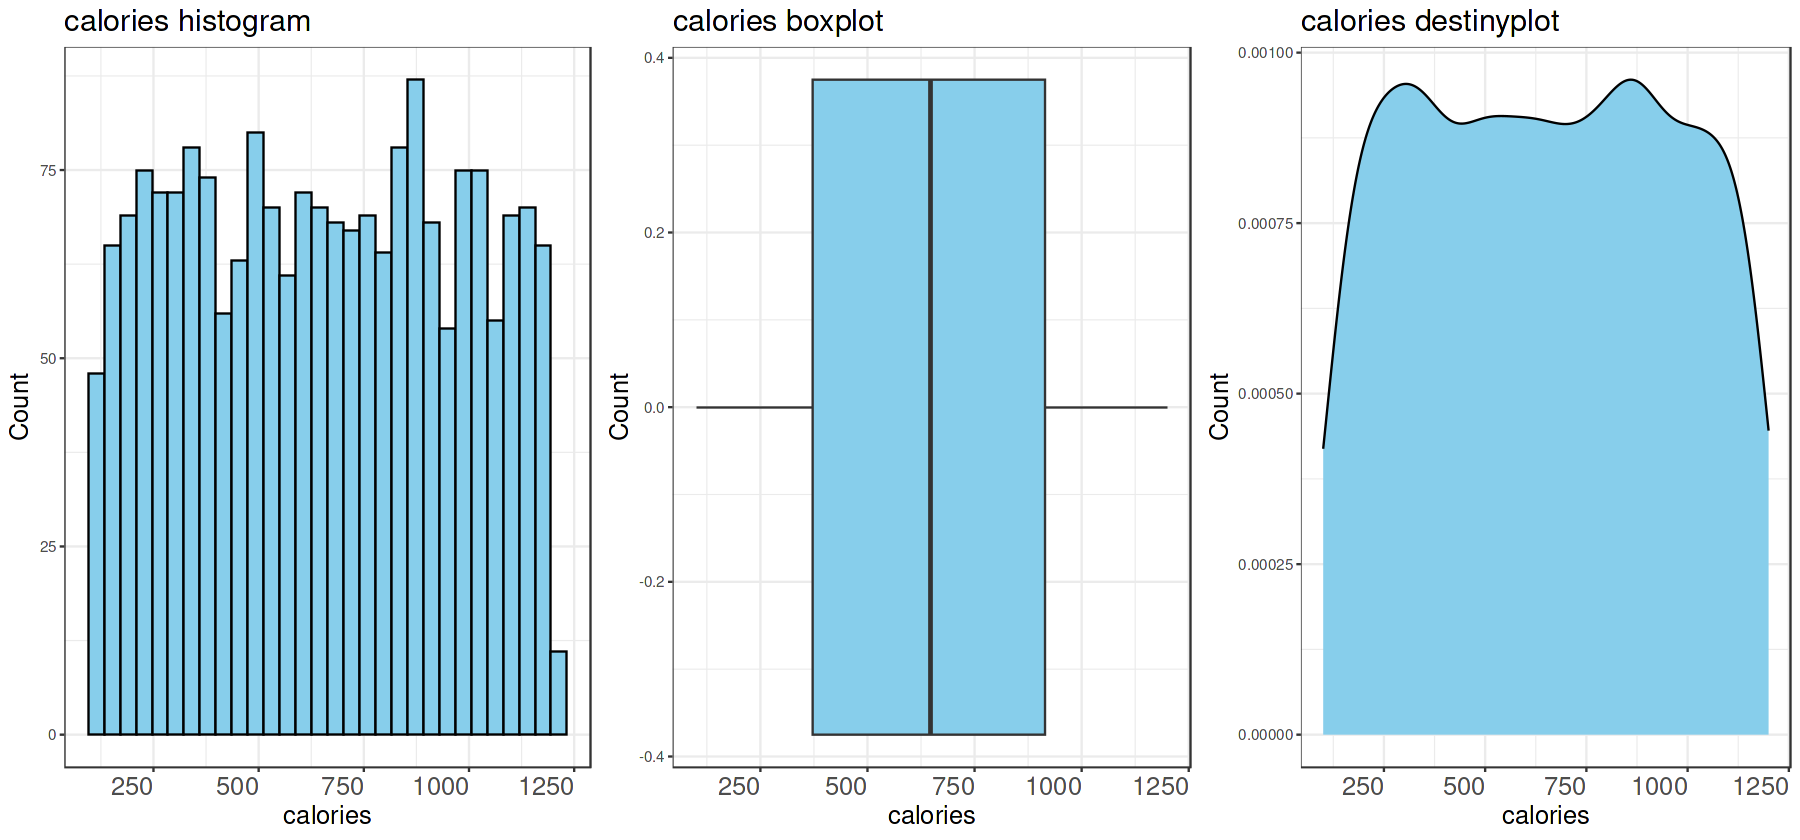

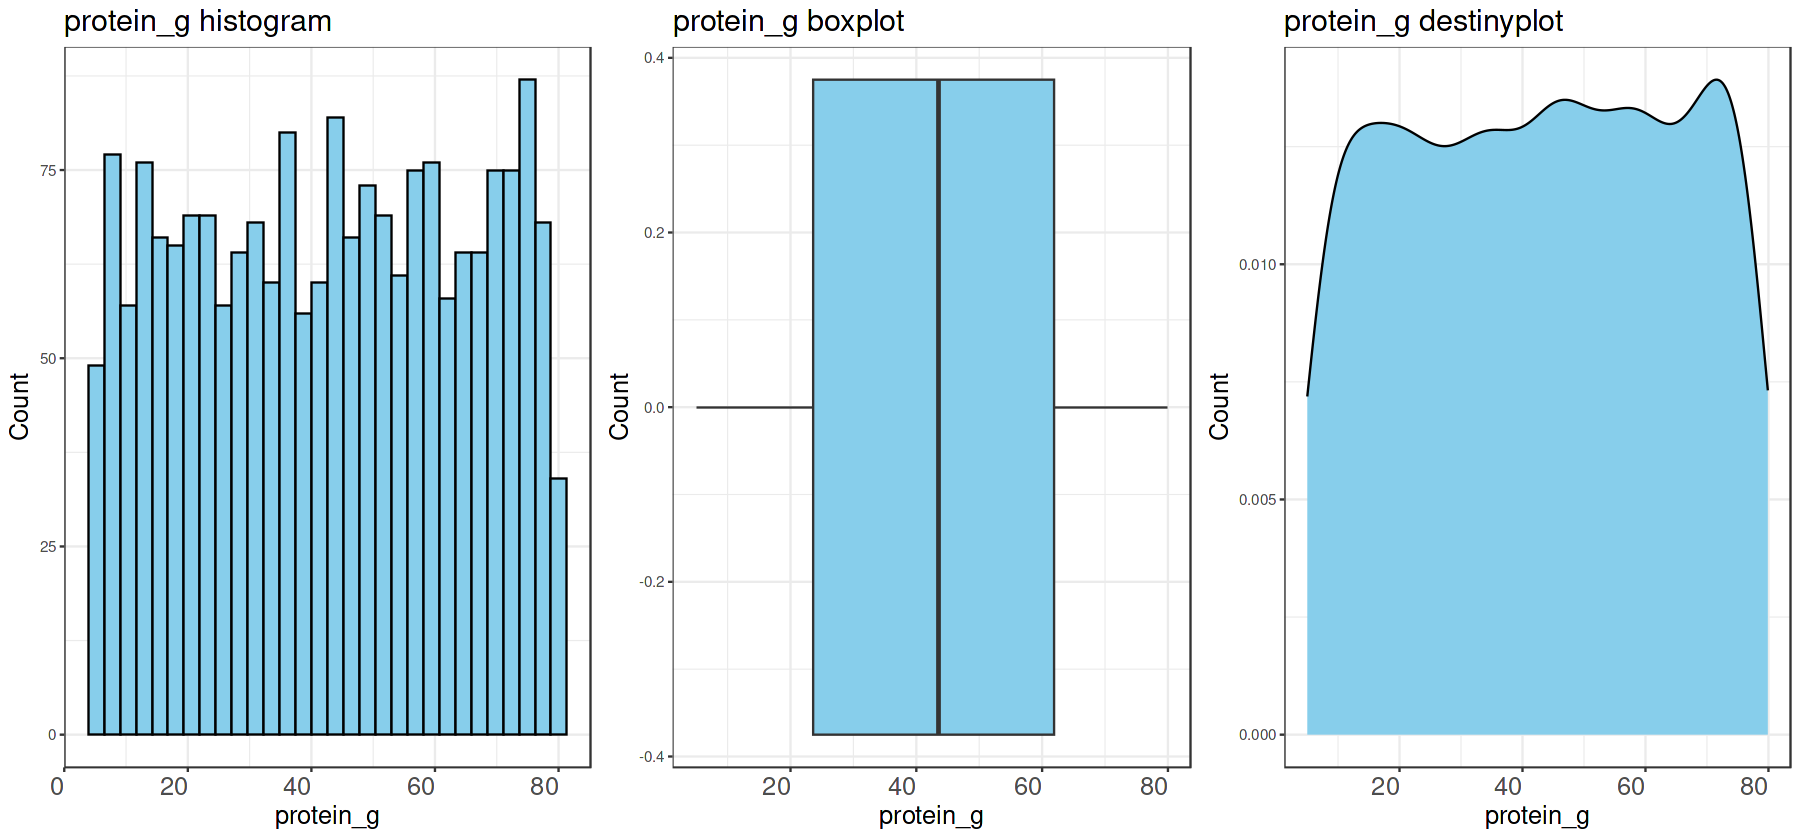

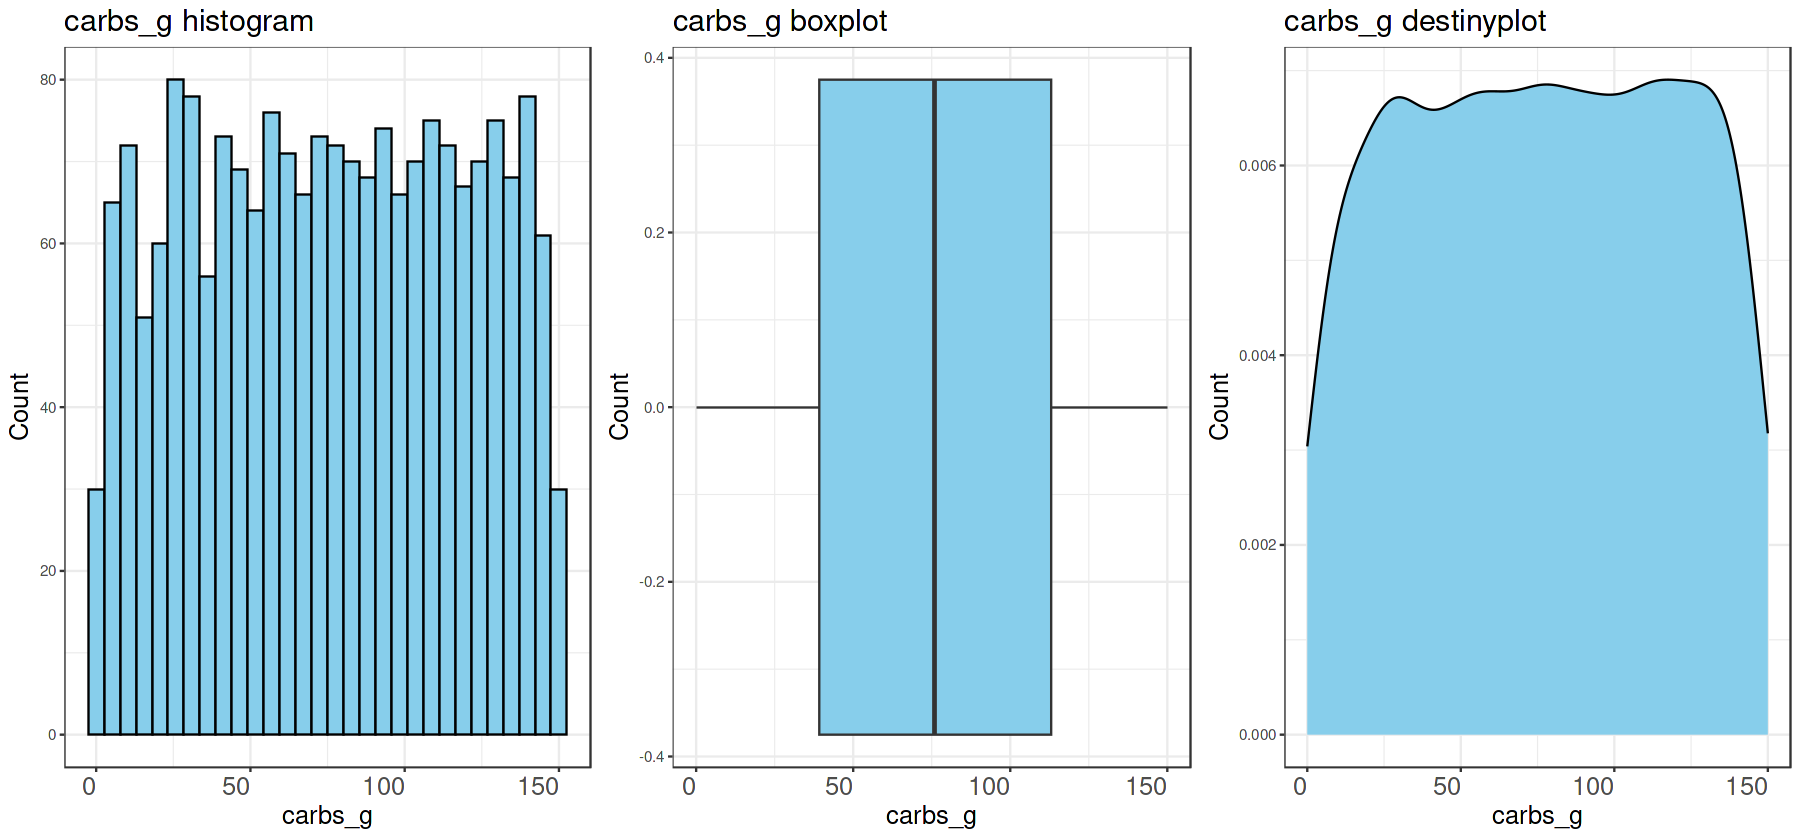

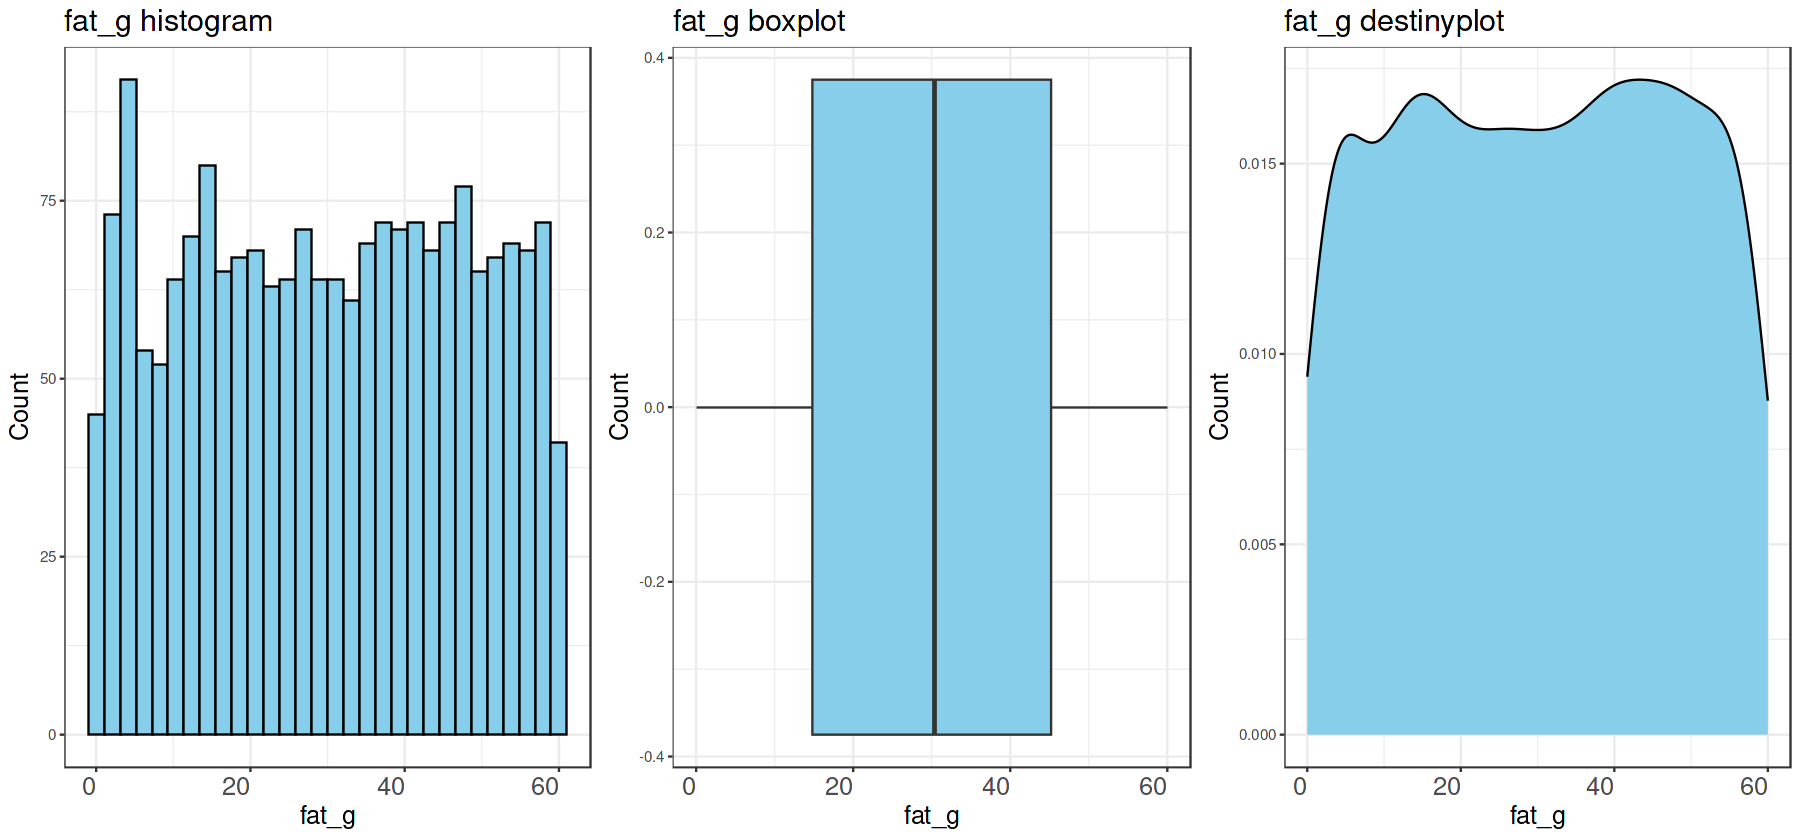

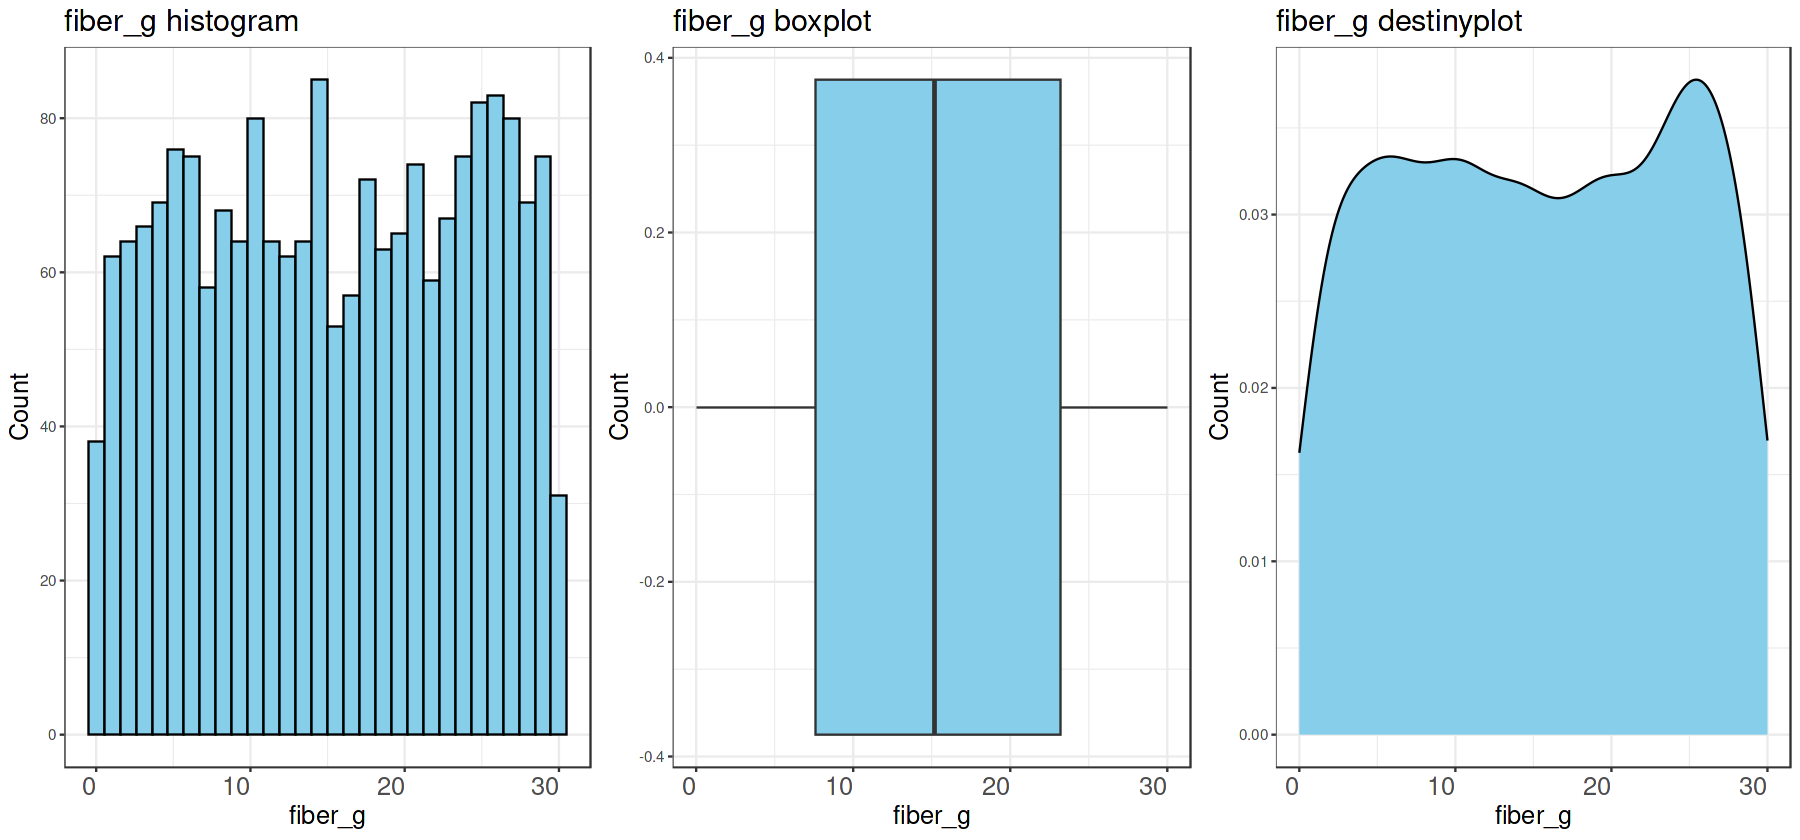

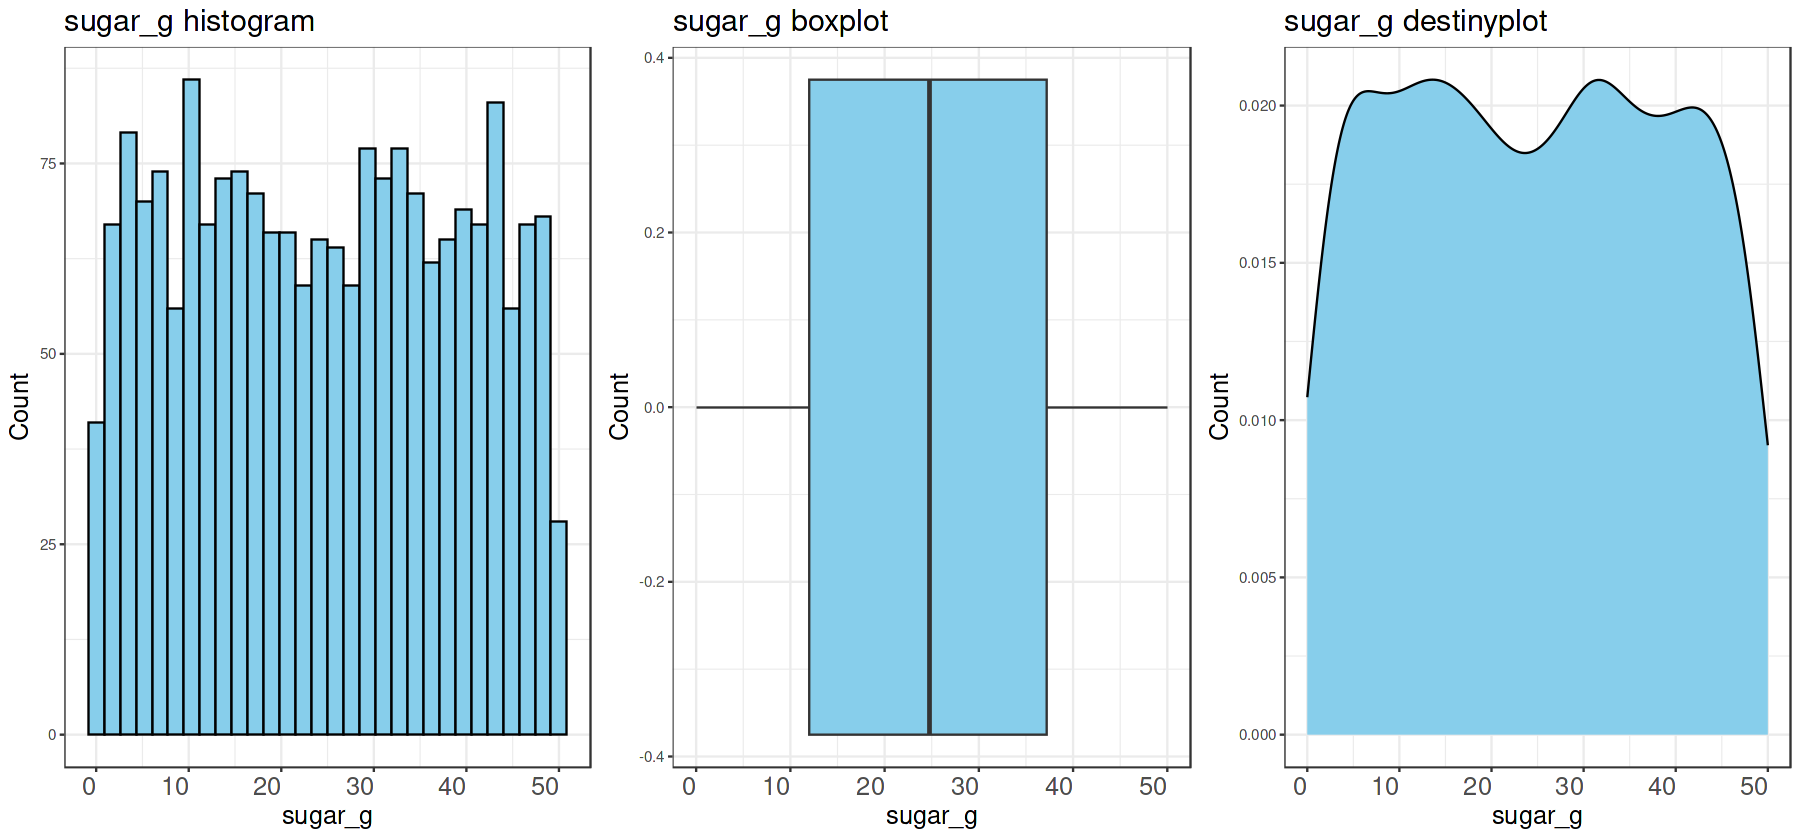

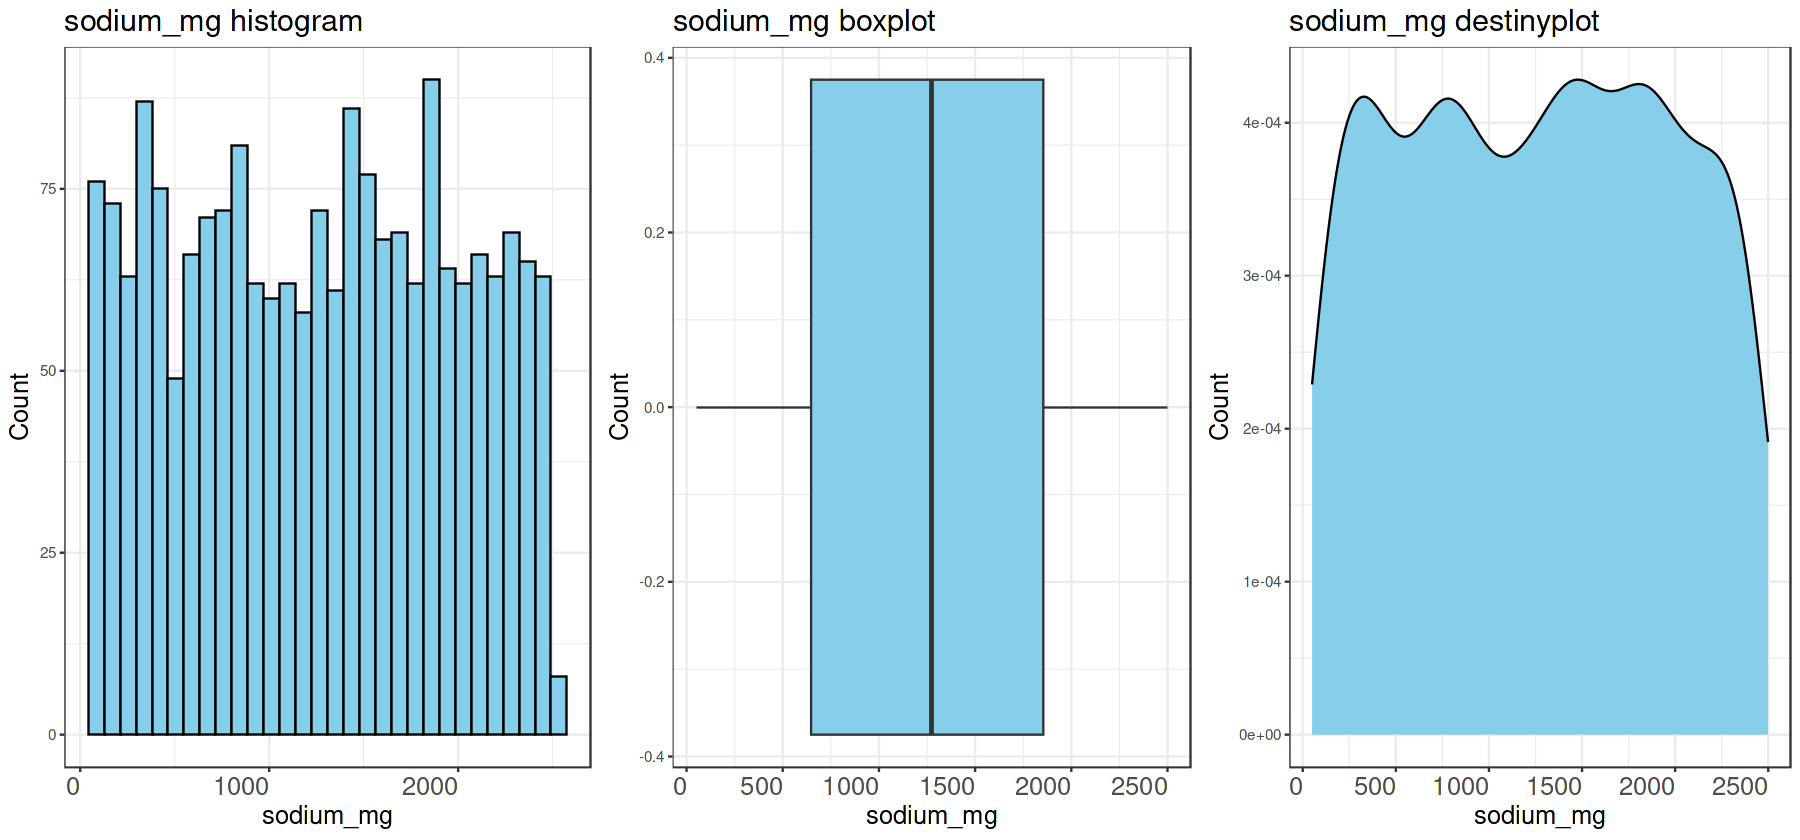

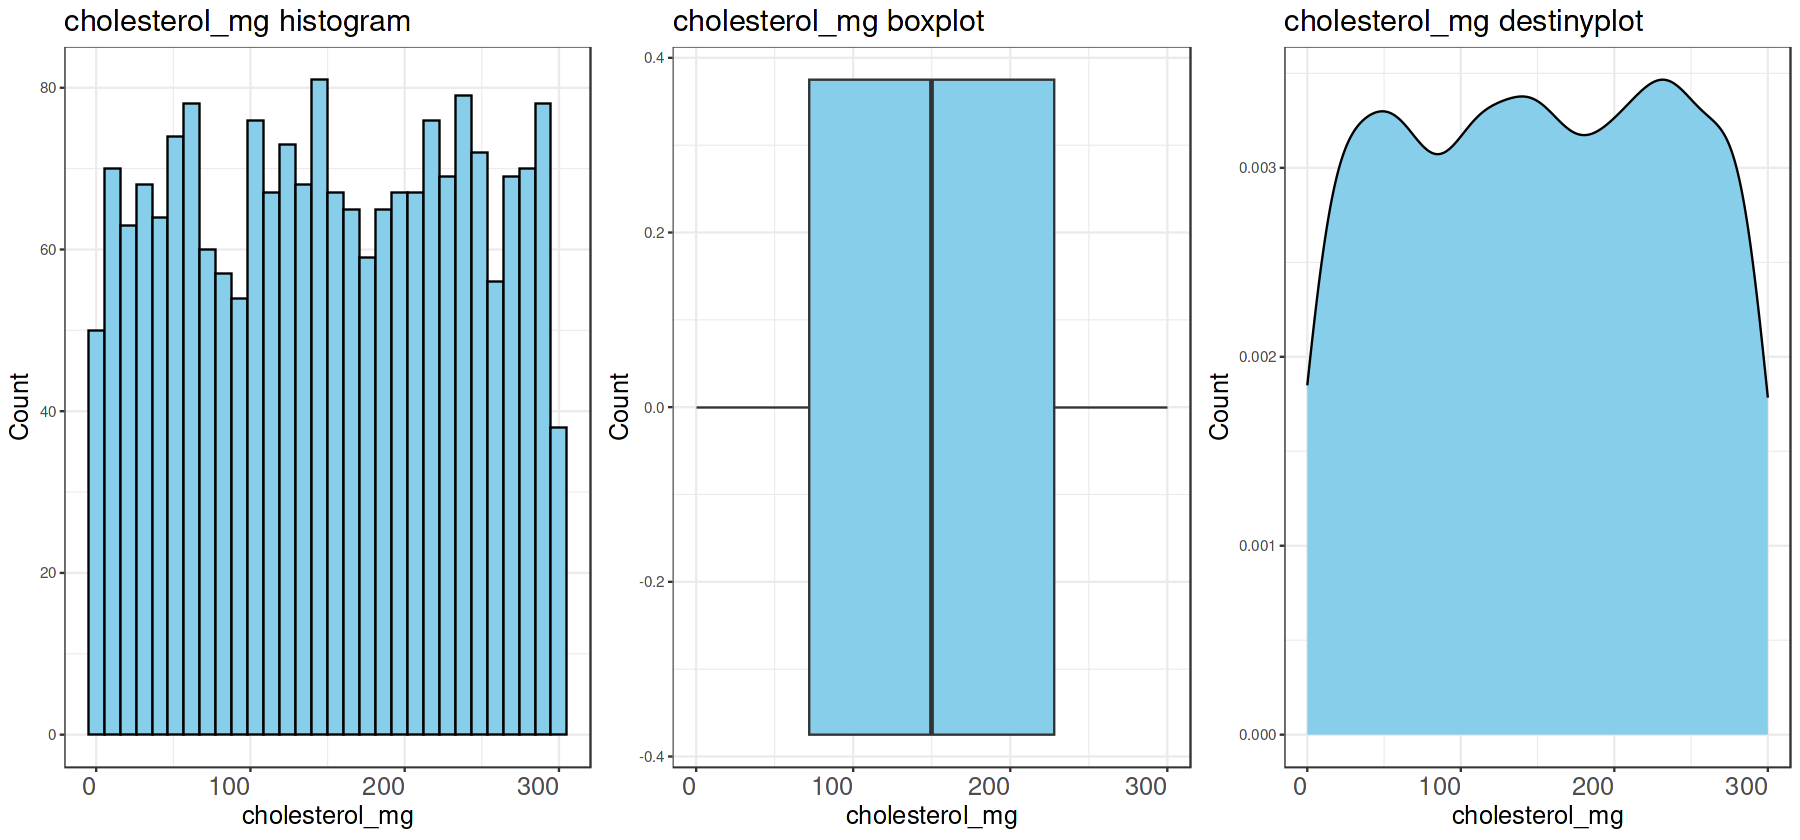

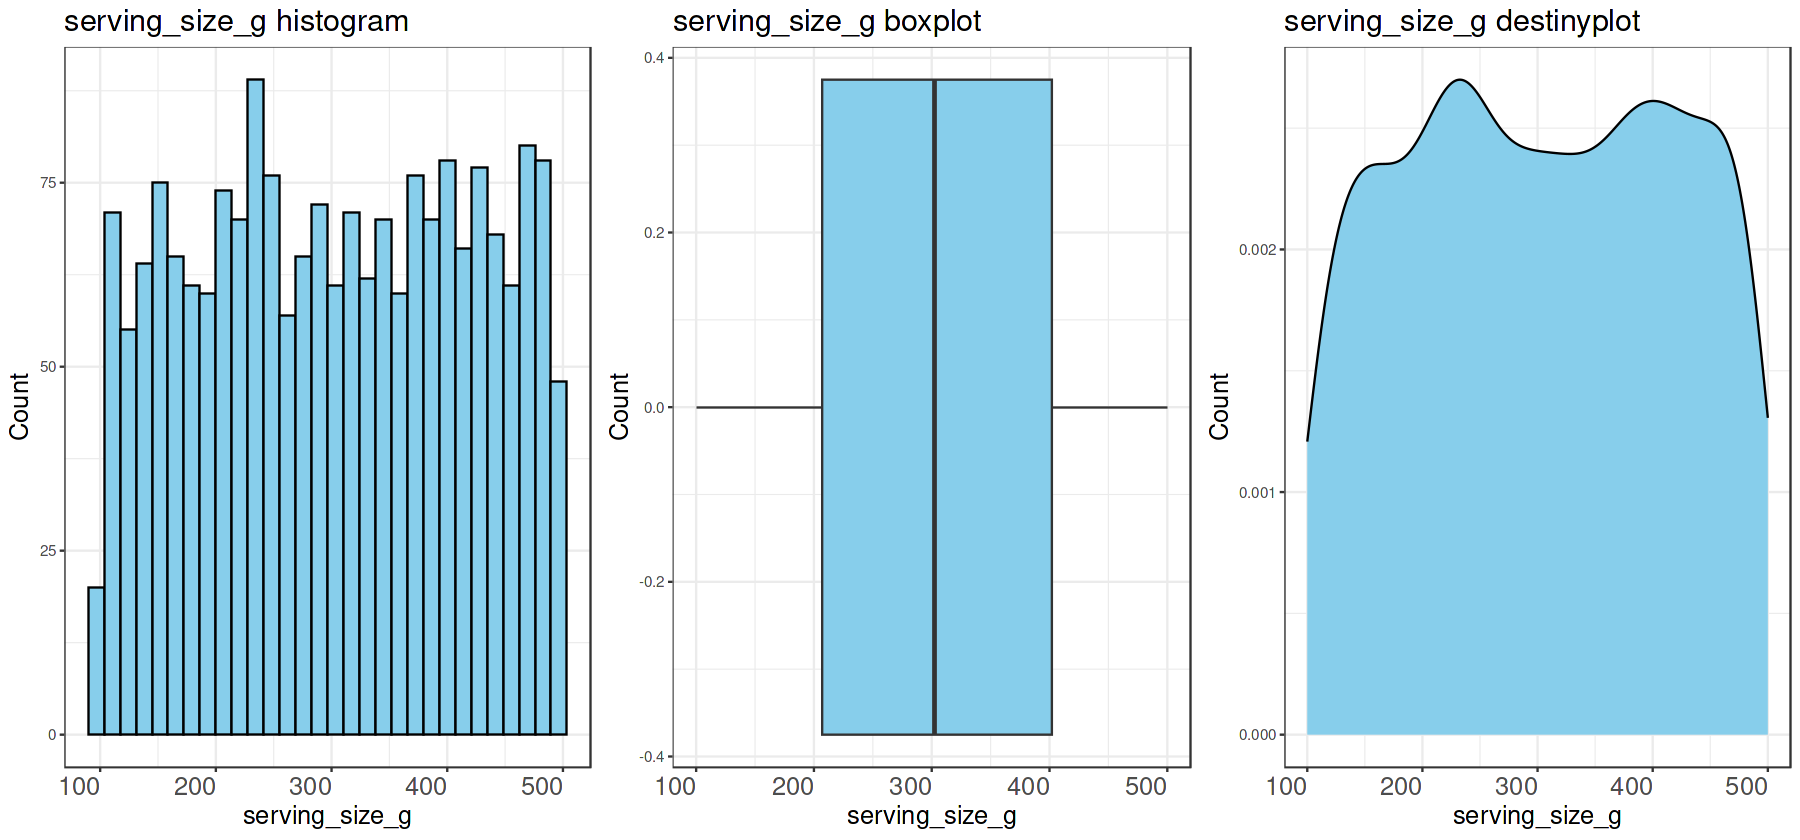

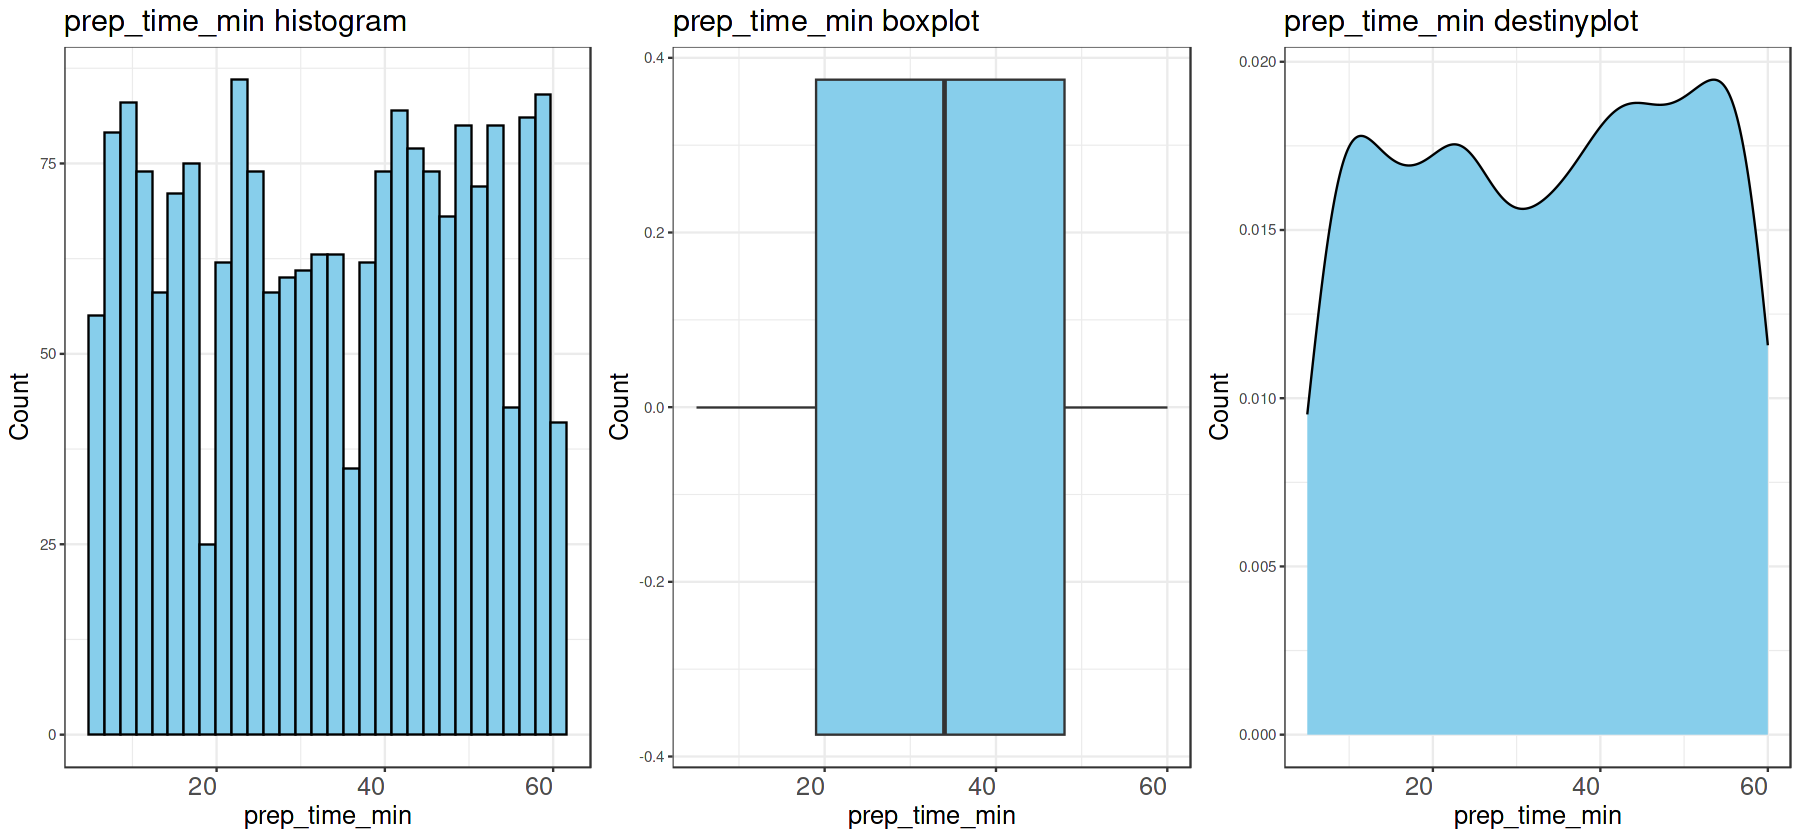

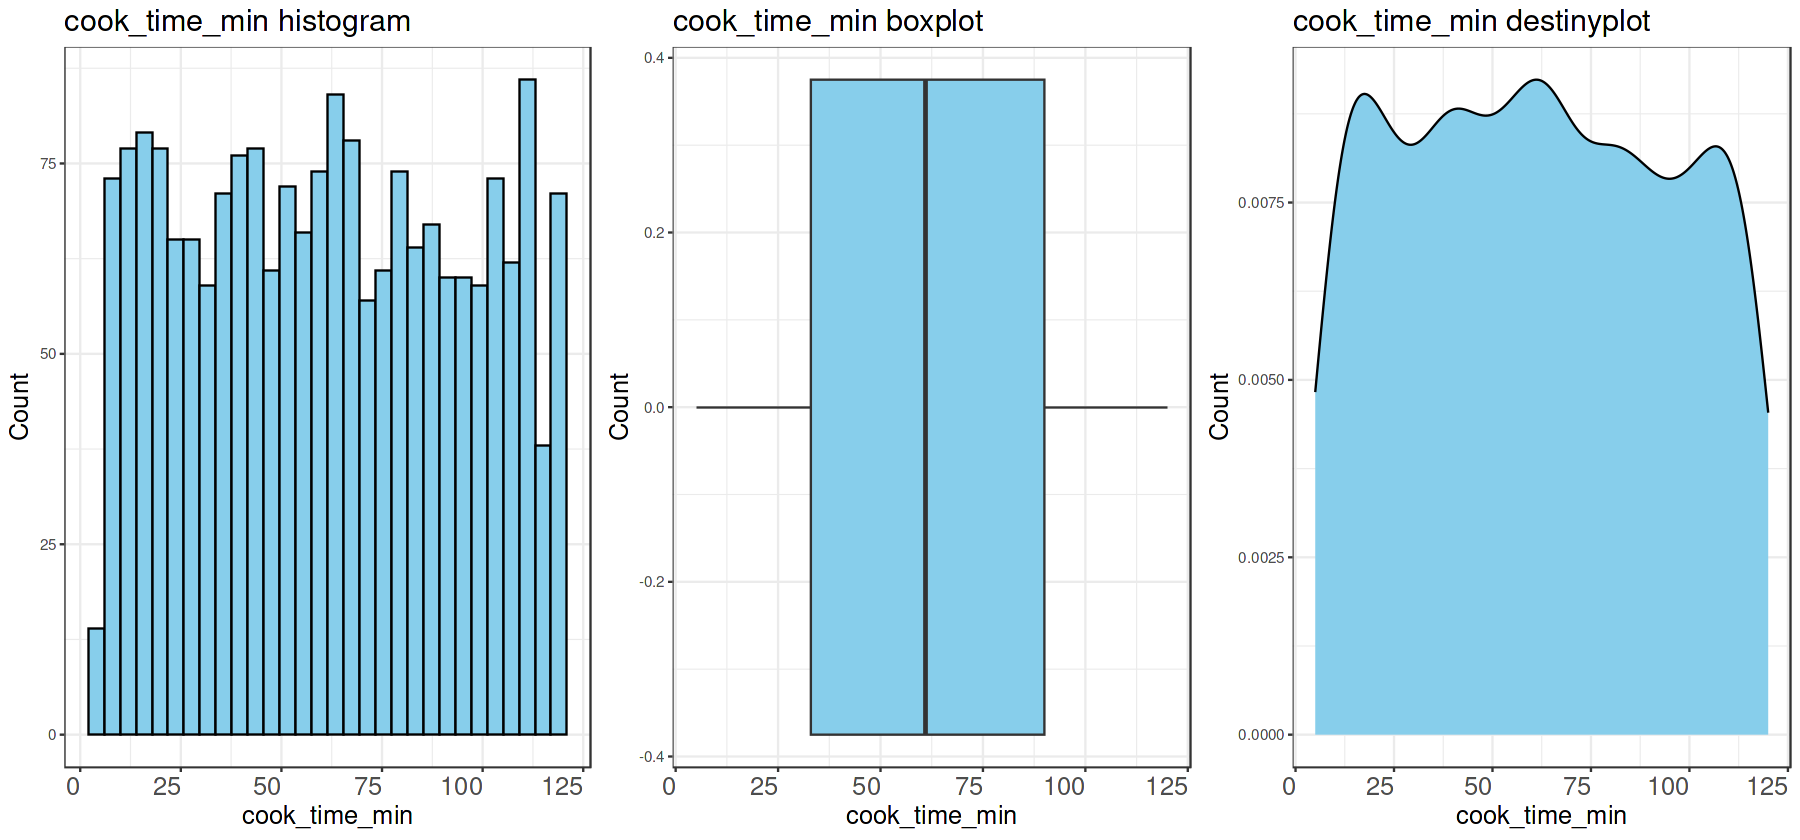

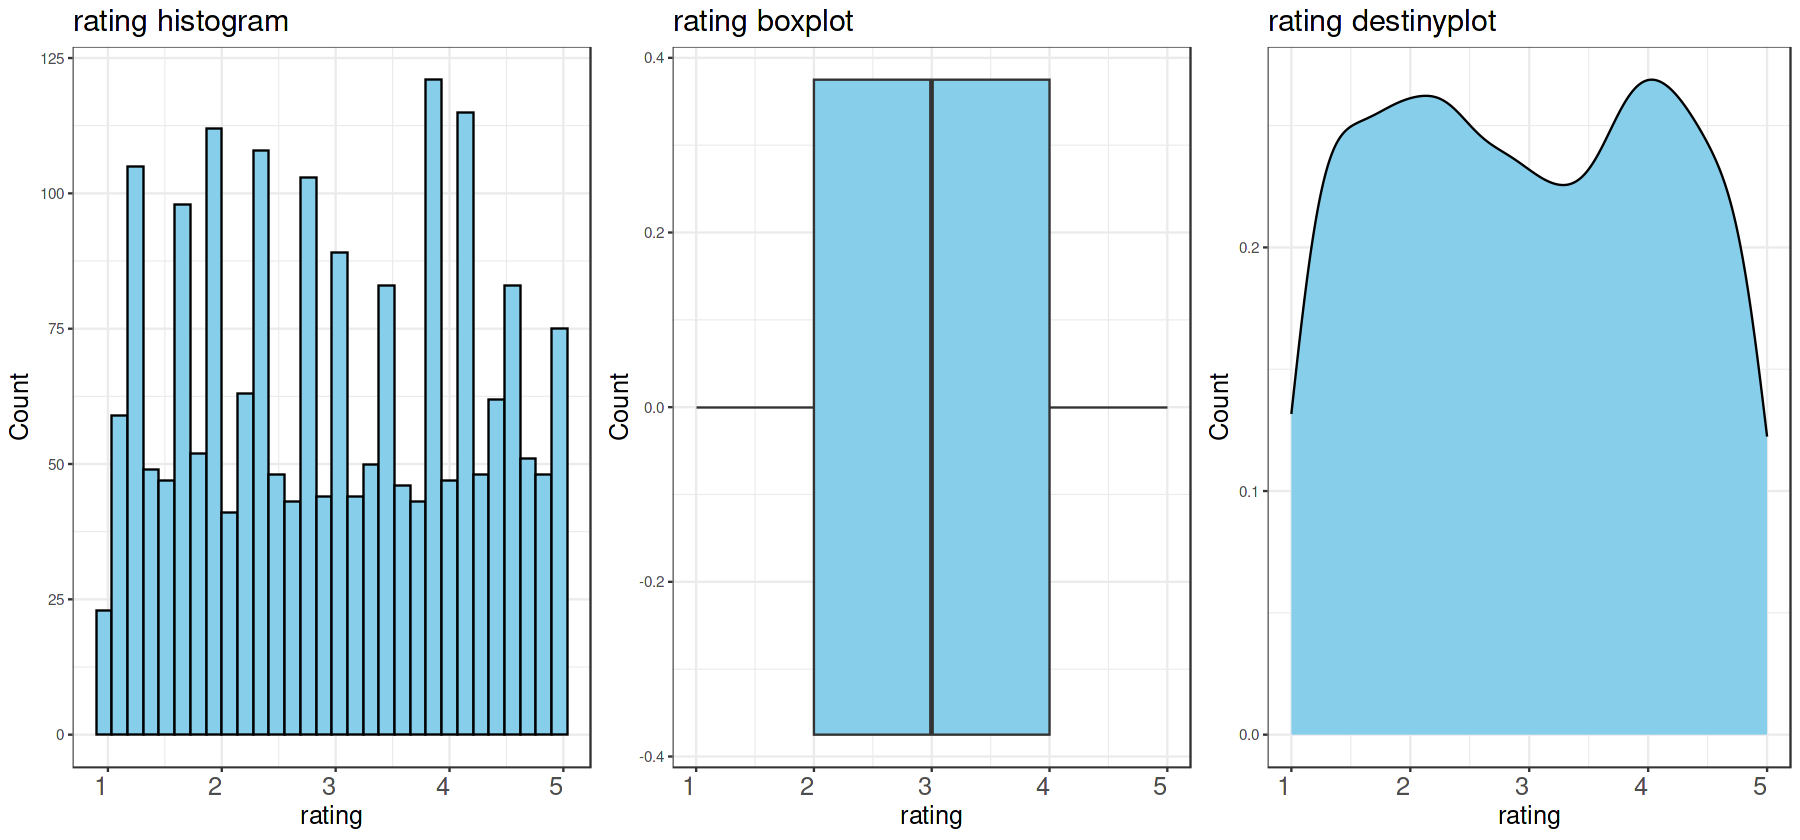

In [15]:
options(repr.plot.width = 15.0, repr.plot.height = 7.0)

for(i in num_cols){
    col_name <- i 
    a <- ggplot(df) + geom_histogram(aes(x= .data[[col_name]]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= .data[[col_name]]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= .data[[col_name]]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **CountPlot**

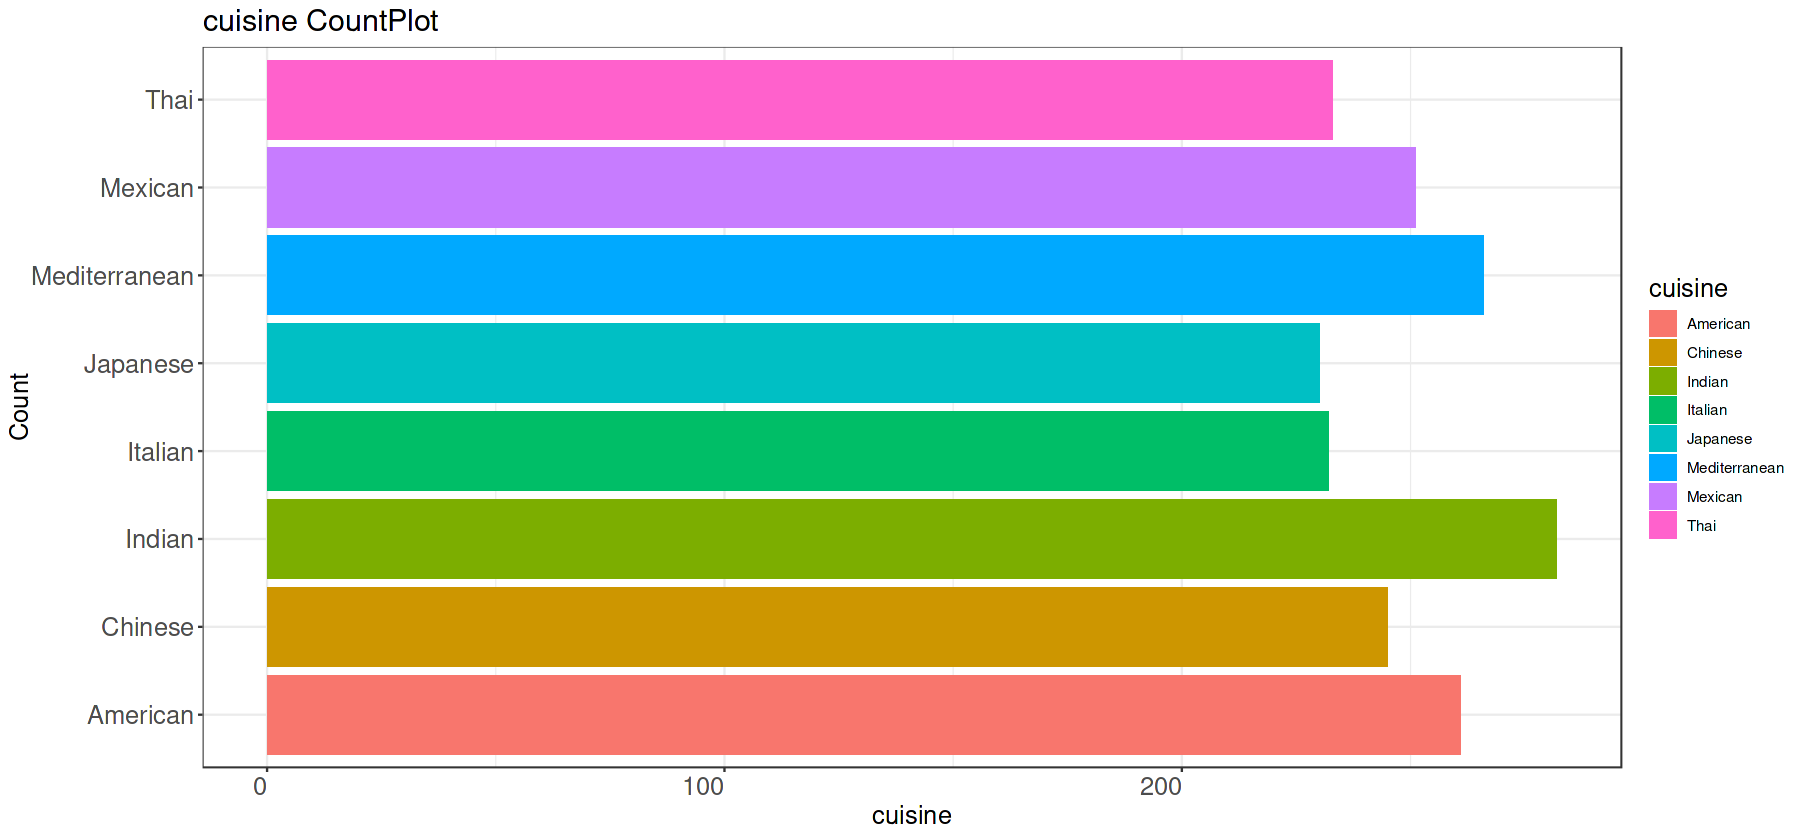

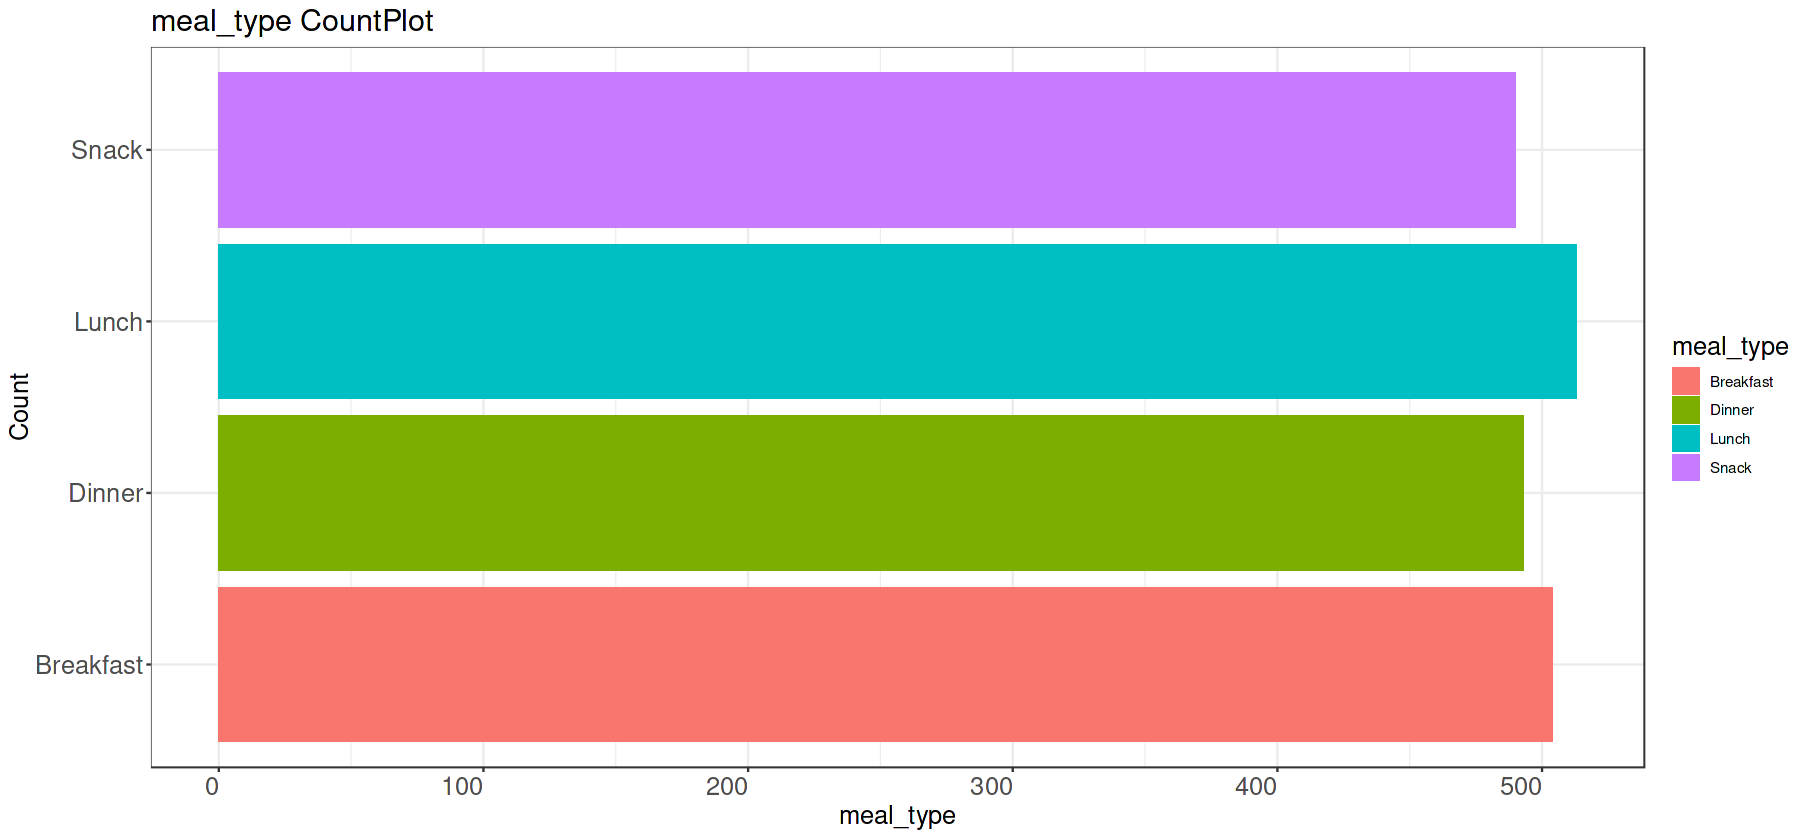

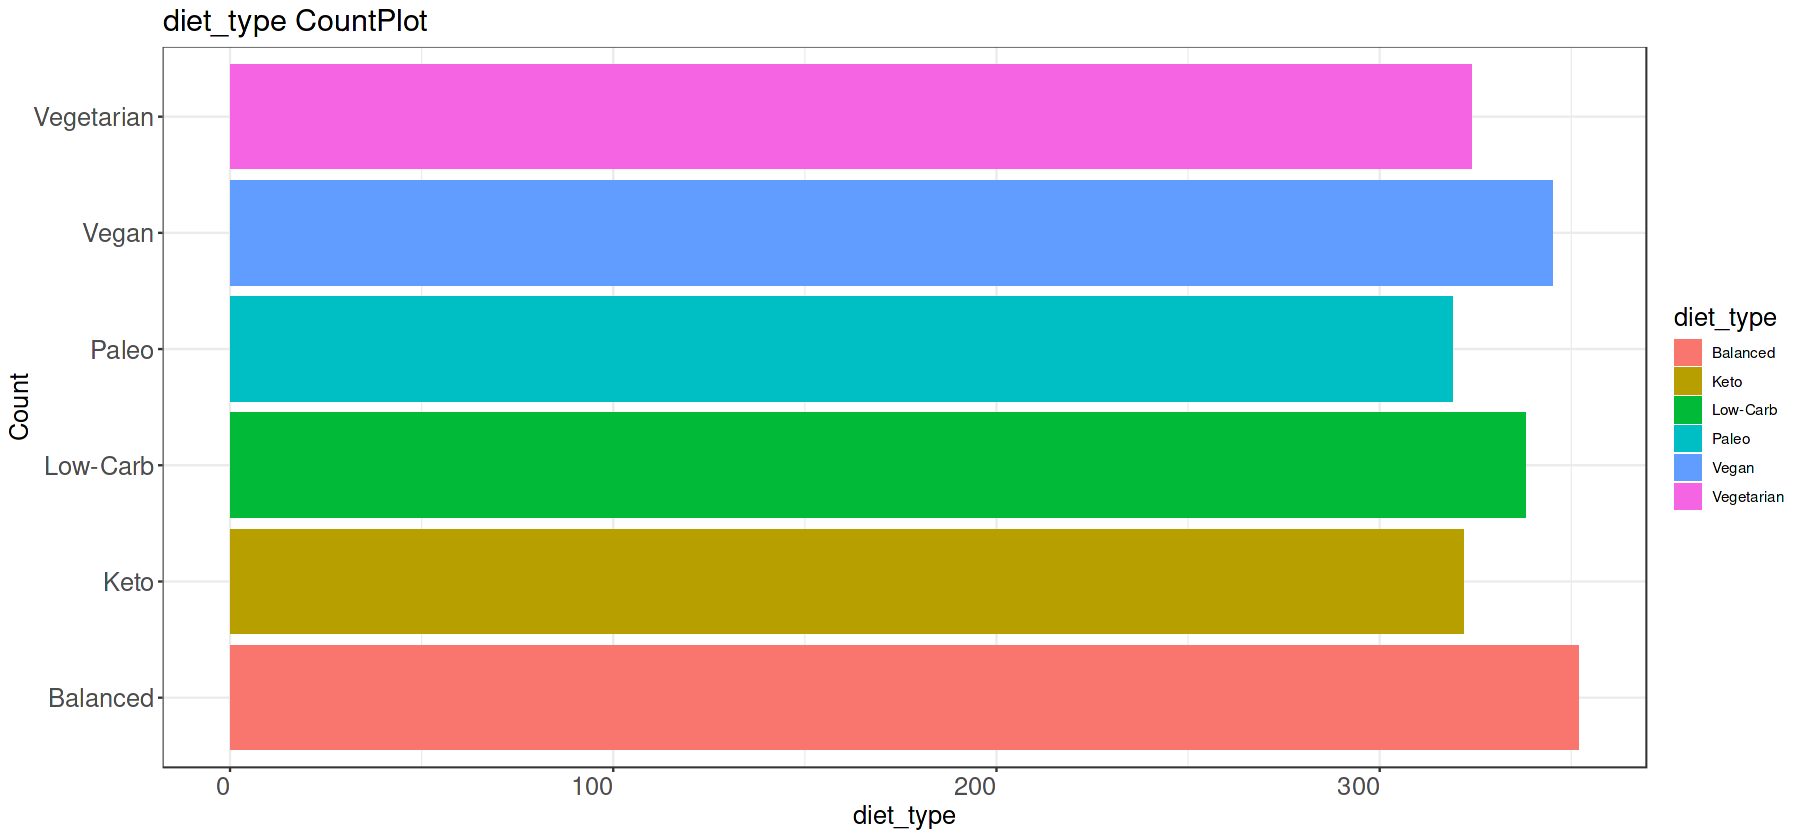

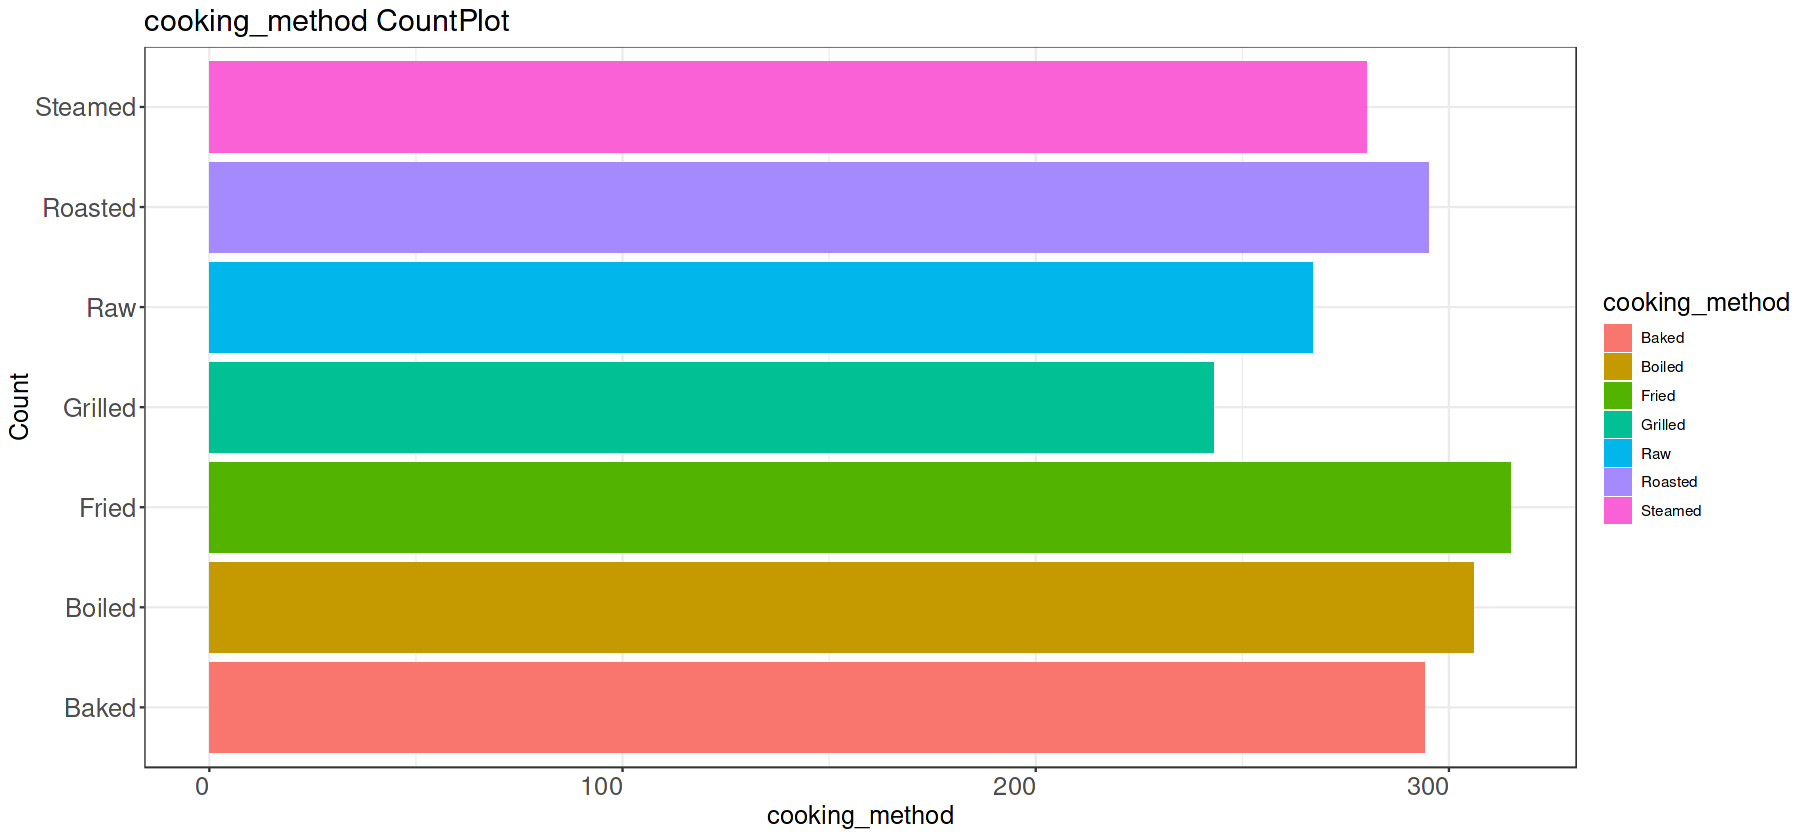

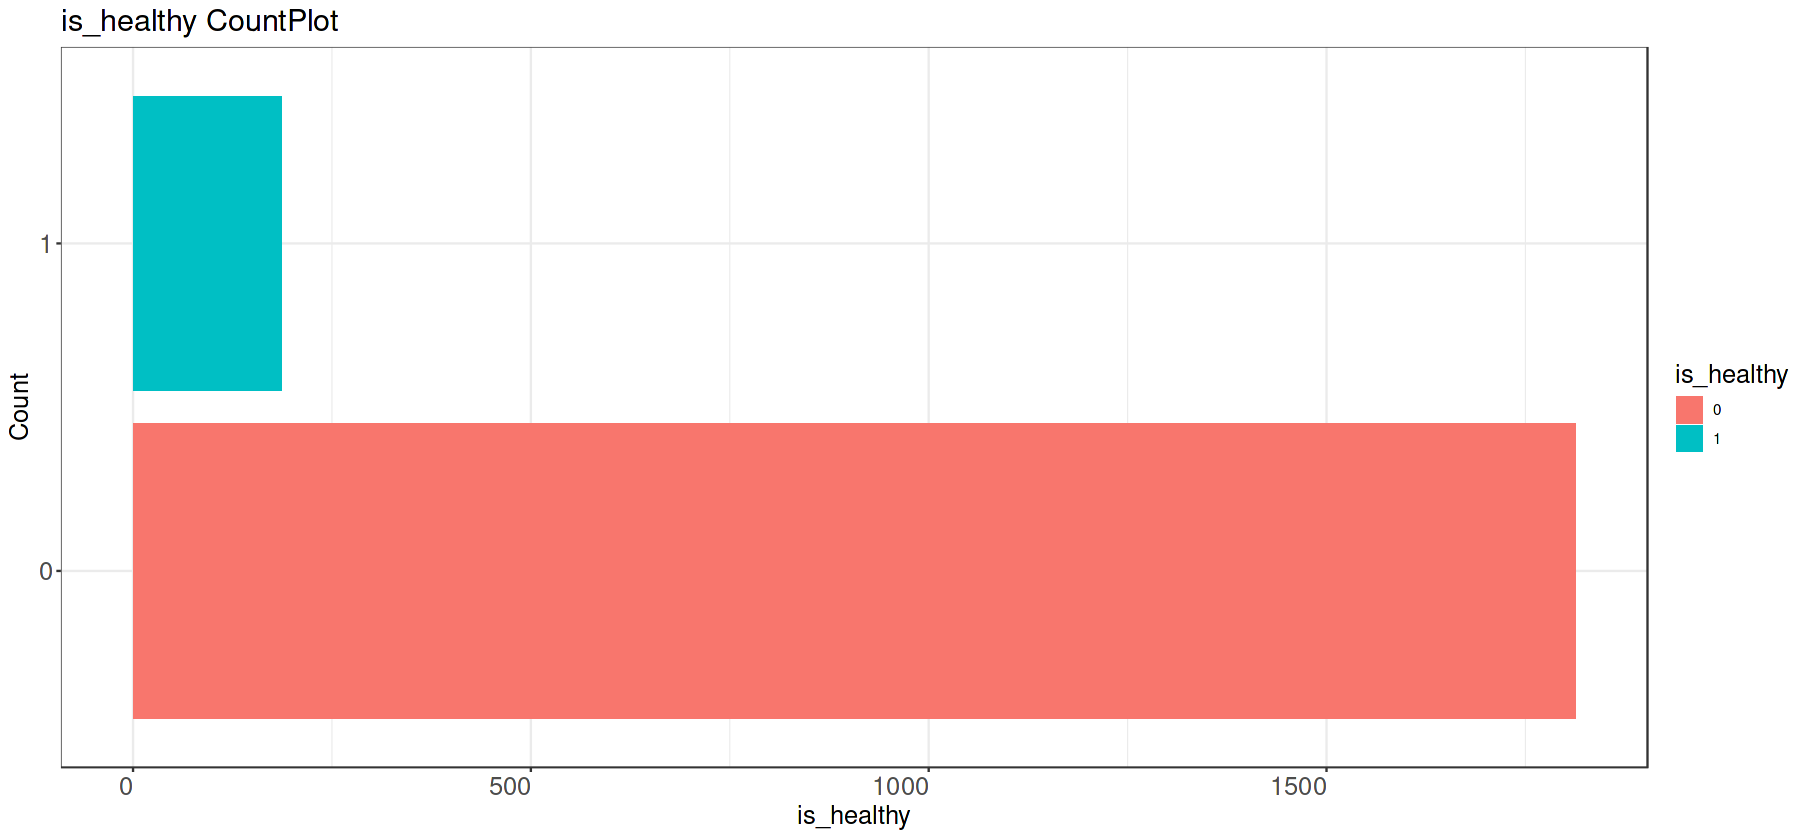

In [16]:
for(i in cat_cols){
    a <- ggplot(df) + geom_bar(aes(y = df[,i], fill = df[,i])) + 
            labs(title = paste0(names(df[i]),' CountPlot'), x = names(df[i]), y = 'Count', fill = i ) + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1)      ,
            title = element_text(size=15)
            )
    grid.arrange(a, ncol = 1)  
}


## **Target Variable**

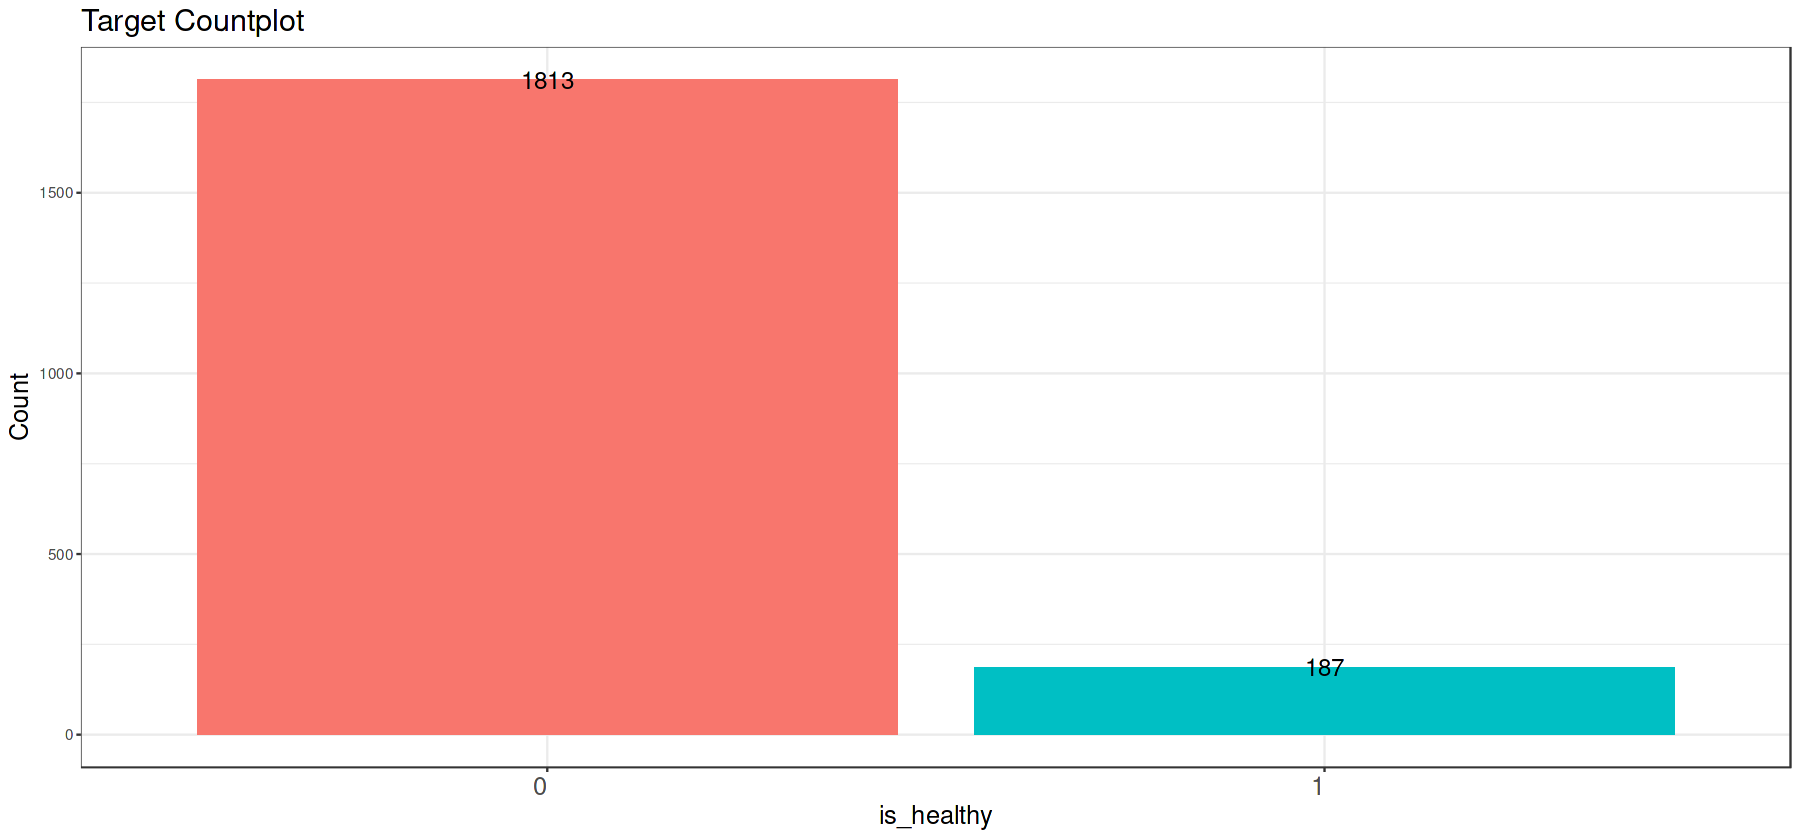

In [17]:
target <- df %>%  
        count(is_healthy) %>%
        mutate(pct = paste(round(n / sum(n) * 100 ,1),'%'))

ggplot(target) + geom_col(aes(x= is_healthy, y = n, fill = is_healthy)) + 
            geom_text(aes(x = is_healthy , y = n , label = round(n,2)),size = 5)+
            labs(title = 'Target Countplot', x= 'is_healthy',y = 'Count') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

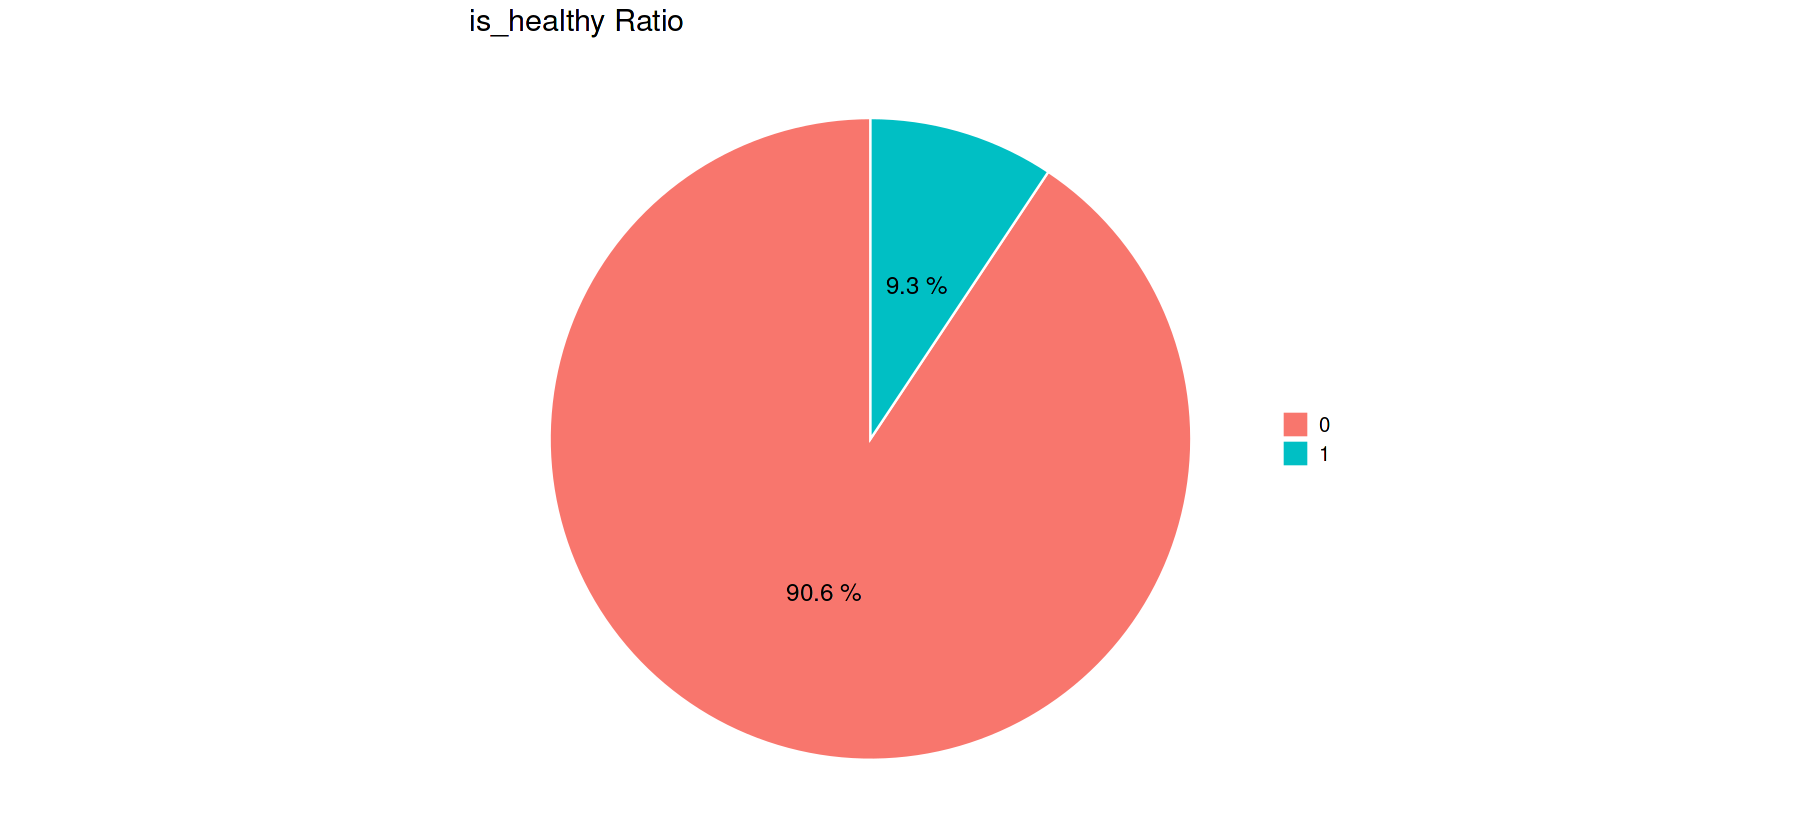

In [18]:
ggplot(target, aes(x = "", y = n, fill = is_healthy)) +
  geom_col(width = 1, color = "white") +  
  coord_polar("y", start = 0) +           
  geom_text(aes(label = pct), 
            position = position_stack(vjust = 0.5),
            size = 5) +                   
  labs(title = "is_healthy Ratio", y = "", x = "") +
  theme_void() +
  theme(
    title = element_text(size = 15),
    legend.title = element_blank(),
    legend.text = element_text(size = 12)
  )

## **Correlation**

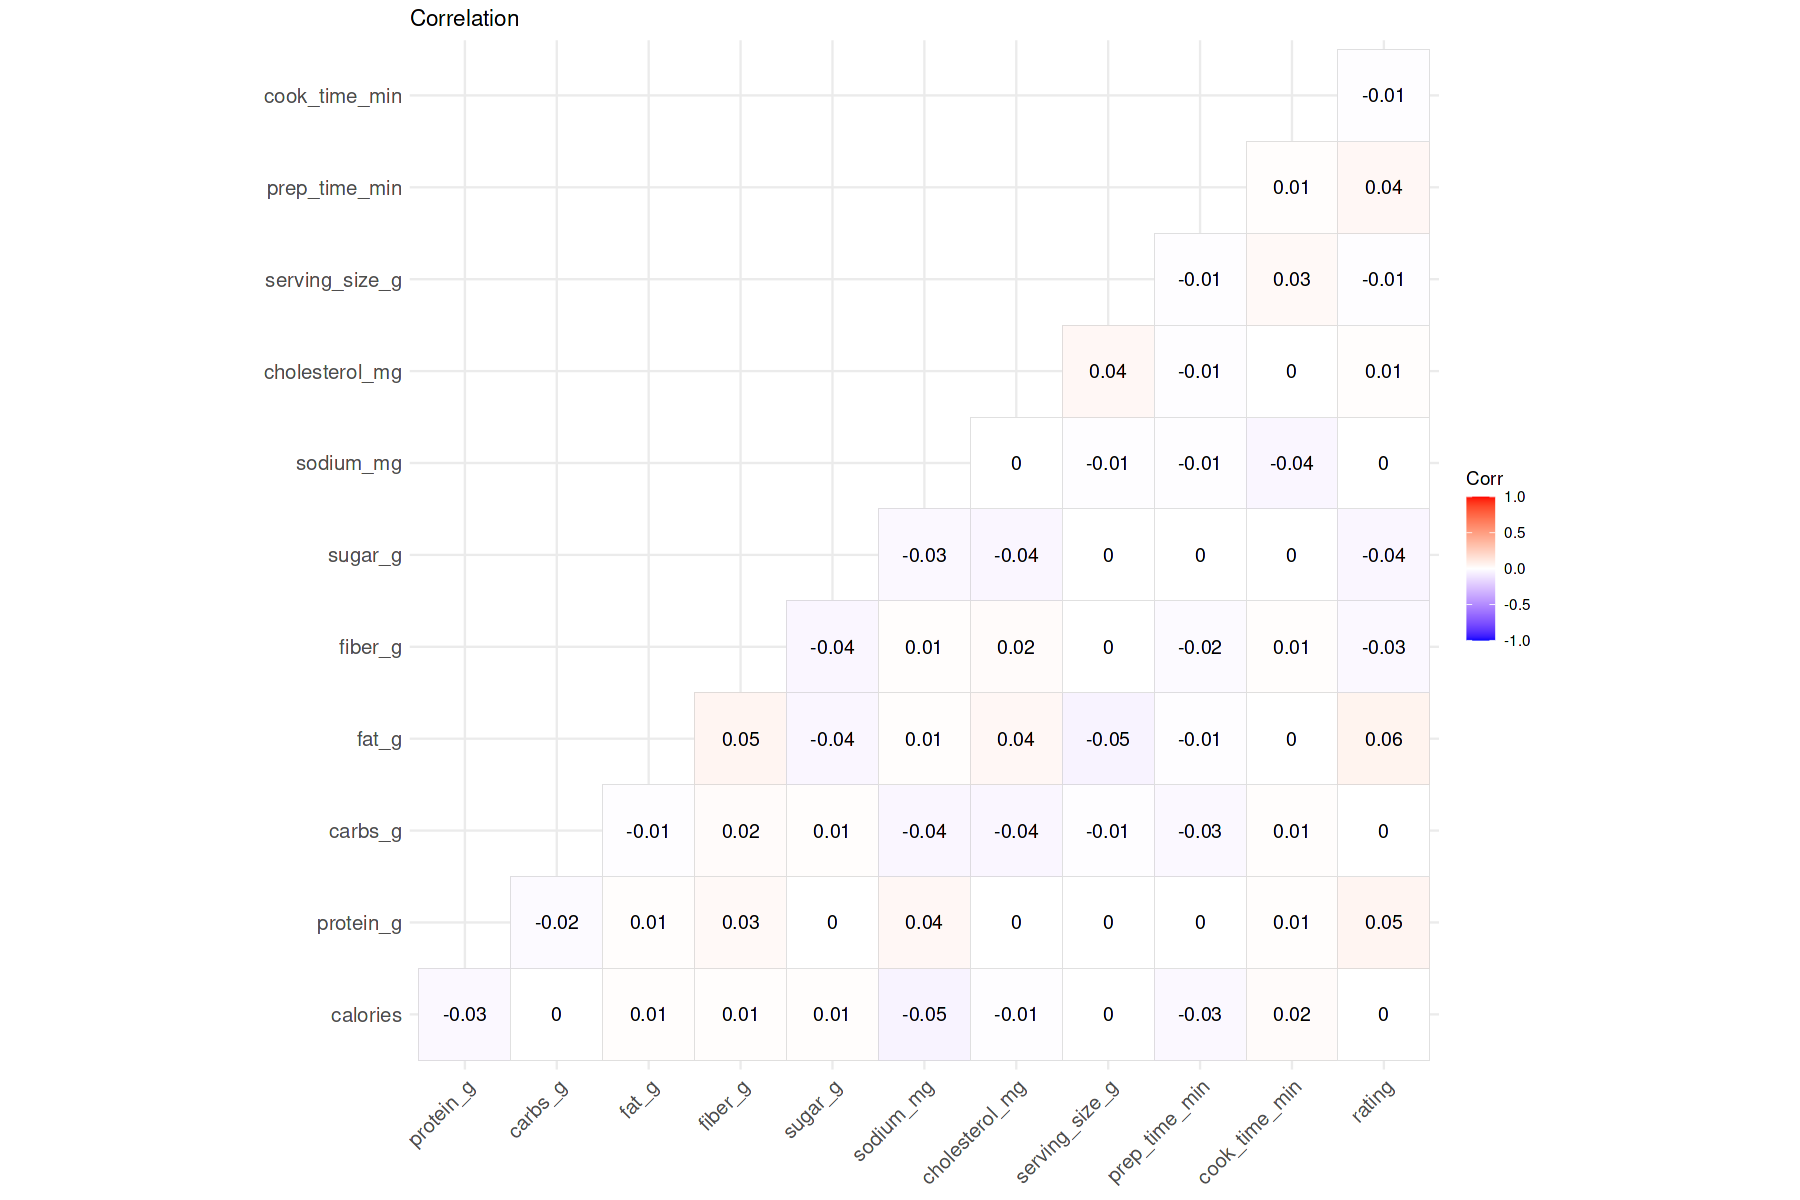

In [19]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

## **Correlation by Target**

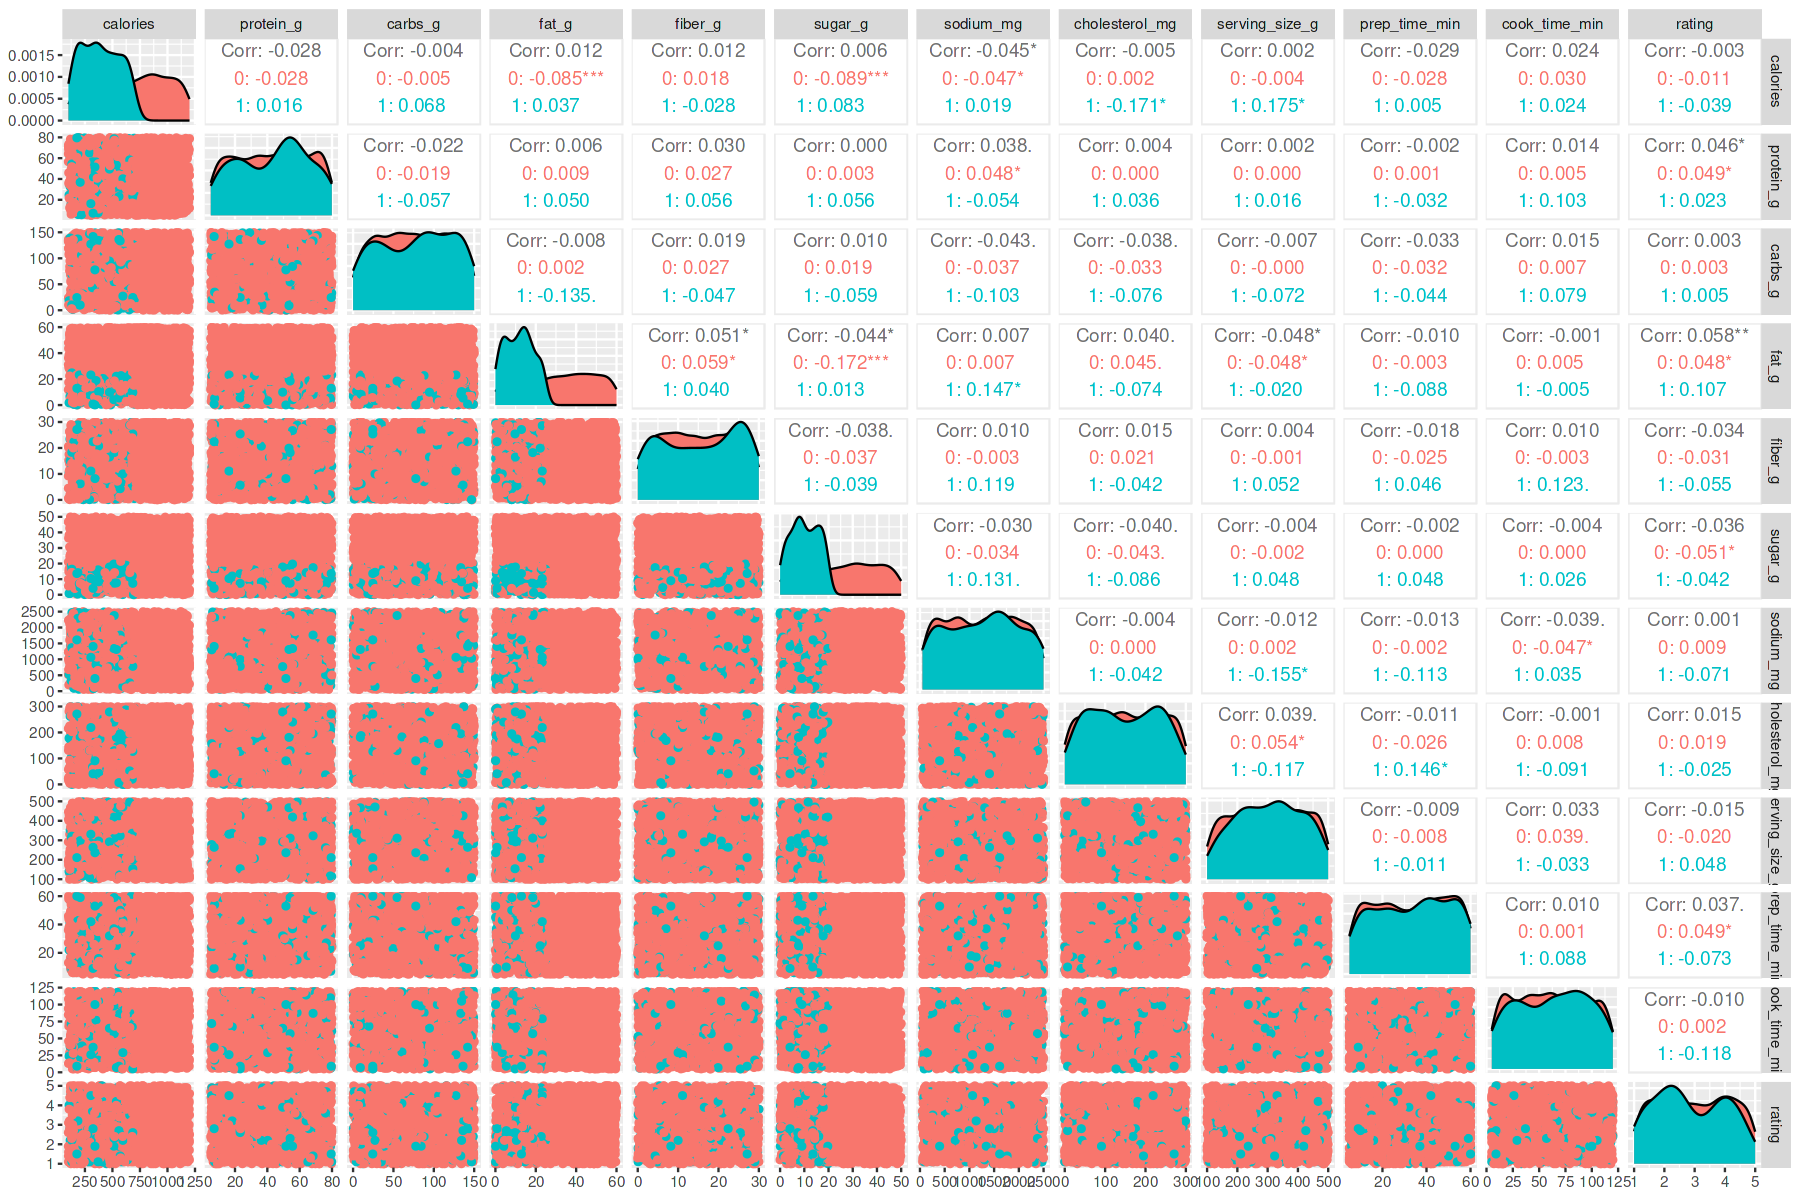

In [20]:
df2 <- df
df2$is_healthy <- as.factor(df2$is_healthy)
ggpairs(
  df2,
  columns = num_cols,   
  mapping = aes(color = is_healthy) 
)

# **Modeling**

In [21]:
library(tidymodels)
library(caret)
library(Metrics)
library(themis)

Loading required package: lattice




Attaching package: ‘caret’




The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity




The following object is masked from ‘package:purrr’:

    lift




The following object is masked from ‘package:httr’:

    progress





Attaching package: ‘Metrics’




The following objects are masked from ‘package:caret’:

    precision, recall




The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape




## **Preprocessing**

In [22]:
df$cuisine <- as.numeric(df$cuisine)
df$meal_type <- as.numeric(df$meal_type)
df$diet_type <- as.numeric(df$diet_type)
df$cooking_method <- as.numeric(df$cooking_method)

In [23]:
head(df)

,cuisine,meal_type,diet_type,calories,protein_g,carbs_g,fat_g,fiber_g,sugar_g,sodium_mg,cholesterol_mg,serving_size_g,cooking_method,prep_time_min,cook_time_min,rating,is_healthy
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>
1,3,3,2,737,52.4,43.9,34.3,16.8,42.9,2079,91,206,4,47,56,4.4,0
2,7,3,4,182,74.7,144.4,0.1,22.3,38.6,423,7,317,6,51,34,2.4,0
3,3,4,4,881,52.9,97.3,18.8,20.0,37.5,2383,209,395,2,58,29,4.3,0
4,7,4,2,427,17.5,73.1,7.6,9.8,41.7,846,107,499,4,14,81,4.6,0
5,8,3,5,210,51.6,104.3,26.3,24.8,18.2,1460,42,486,5,47,105,4.3,0
6,4,2,1,484,55.3,130.3,0.1,29.7,1.6,411,162,209,7,56,112,1.6,1


## **Train Test Split**

In [24]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [25]:
rec <- recipe(is_healthy ~ ., data = train) %>%
  step_dummy(all_nominal_predictors()) %>%       
  step_zv(all_predictors()) %>%                  
  step_normalize(all_numeric_predictors()) %>%    
  step_smote(is_healthy)                               

## **XGB**

In [26]:
xgb_spec <- boost_tree(
    trees = tune(),
    tree_depth = tune(),
    learn_rate = tune(),
    mtry = tune(),
    min_n = tune(),
    loss_reduction = tune()
  ) %>%
  set_mode("classification") %>%
  set_engine("xgboost", eval_metric = "aucpr")

In [27]:
xgb_wf <- workflow() %>%
  add_recipe(rec) %>%
  add_model(xgb_spec)

xgb_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: boost_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_dummy()
• step_zv()
• step_normalize()
• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Boosted Tree Model Specification (classification)

Main Arguments:
  mtry = tune()
  trees = tune()
  min_n = tune()
  tree_depth = tune()
  learn_rate = tune()
  loss_reduction = tune()

Engine-Specific Arguments:
  eval_metric = aucpr

Computational engine: xgboost 


## **5-FOLD**

In [28]:
folds <- vfold_cv(train, v = 5, strata = is_healthy)

## **Grid Search**

In [29]:
xgb_ctrl <- control_grid(verbose = TRUE,
                         save_pred = TRUE,
                         save_workflow = TRUE)

In [30]:
params <- xgb_wf %>%
  extract_parameter_set_dials() %>%
  update(
    trees = trees(range = c(200, 1500)),
    mtry = mtry(range = c(5, 20)),
    min_n = min_n(range = c(10, 90)),
    tree_depth = tree_depth(range = c(11, 20)),
    learn_rate = learn_rate(range = c(-2,3))
  ) %>%
  finalize(train)

In [31]:
res <- tune_grid(
  xgb_wf,
  resamples = folds,
  grid = 4,
  control = xgb_ctrl,
  param_info = params,
  metrics = metric_set(roc_auc, f_meas, yardstick::accuracy)
)


i Fold1: preprocessor 1/1



✓ Fold1: preprocessor 1/1



i Fold1: preprocessor 1/1, model 1/4



✓ Fold1: preprocessor 1/1, model 1/4



i Fold1: preprocessor 1/1, model 1/4 (extracts)



i Fold1: preprocessor 1/1, model 1/4 (predictions)



i Fold1: preprocessor 1/1, model 2/4



✓ Fold1: preprocessor 1/1, model 2/4



i Fold1: preprocessor 1/1, model 2/4 (extracts)



i Fold1: preprocessor 1/1, model 2/4 (predictions)



i Fold1: preprocessor 1/1, model 3/4



✓ Fold1: preprocessor 1/1, model 3/4



i Fold1: preprocessor 1/1, model 3/4 (extracts)



i Fold1: preprocessor 1/1, model 3/4 (predictions)



i Fold1: preprocessor 1/1, model 4/4



✓ Fold1: preprocessor 1/1, model 4/4



i Fold1: preprocessor 1/1, model 4/4 (extracts)



i Fold1: preprocessor 1/1, model 4/4 (predictions)



i Fold2: preprocessor 1/1



✓ Fold2: preprocessor 1/1



i Fold2: preprocessor 1/1, model 1/4



✓ Fold2: preprocessor 1/1, model 1/4



i Fold2: preprocessor 1/1, model 1/4 (extracts)



i Fold2: preprocessor 1/1, model 1/4 (predictions)



i Fold2: preprocessor 1/1, model 2/4



✓ Fold2: preprocessor 1/1, model 2/4



i Fold2: preprocessor 1/1, model 2/4 (extracts)



i Fold2: preprocessor 1/1, model 2/4 (predictions)



i Fold2: preprocessor 1/1, model 3/4



✓ Fold2: preprocessor 1/1, model 3/4



i Fold2: preprocessor 1/1, model 3/4 (extracts)



i Fold2: preprocessor 1/1, model 3/4 (predictions)



i Fold2: preprocessor 1/1, model 4/4



✓ Fold2: preprocessor 1/1, model 4/4



i Fold2: preprocessor 1/1, model 4/4 (extracts)



i Fold2: preprocessor 1/1, model 4/4 (predictions)



i Fold3: preprocessor 1/1



✓ Fold3: preprocessor 1/1



i Fold3: preprocessor 1/1, model 1/4



✓ Fold3: preprocessor 1/1, model 1/4



i Fold3: preprocessor 1/1, model 1/4 (extracts)



i Fold3: preprocessor 1/1, model 1/4 (predictions)



i Fold3: preprocessor 1/1, model 2/4



✓ Fold3: preprocessor 1/1, model 2/4



i Fold3: preprocessor 1/1, model 2/4 (extracts)



i Fold3: preprocessor 1/1, model 2/4 (predictions)



i Fold3: preprocessor 1/1, model 3/4



✓ Fold3: preprocessor 1/1, model 3/4



i Fold3: preprocessor 1/1, model 3/4 (extracts)



i Fold3: preprocessor 1/1, model 3/4 (predictions)



i Fold3: preprocessor 1/1, model 4/4



✓ Fold3: preprocessor 1/1, model 4/4



i Fold3: preprocessor 1/1, model 4/4 (extracts)



i Fold3: preprocessor 1/1, model 4/4 (predictions)



i Fold4: preprocessor 1/1



✓ Fold4: preprocessor 1/1



i Fold4: preprocessor 1/1, model 1/4



✓ Fold4: preprocessor 1/1, model 1/4



i Fold4: preprocessor 1/1, model 1/4 (extracts)



i Fold4: preprocessor 1/1, model 1/4 (predictions)



i Fold4: preprocessor 1/1, model 2/4



✓ Fold4: preprocessor 1/1, model 2/4



i Fold4: preprocessor 1/1, model 2/4 (extracts)



i Fold4: preprocessor 1/1, model 2/4 (predictions)



i Fold4: preprocessor 1/1, model 3/4



✓ Fold4: preprocessor 1/1, model 3/4



i Fold4: preprocessor 1/1, model 3/4 (extracts)



i Fold4: preprocessor 1/1, model 3/4 (predictions)



i Fold4: preprocessor 1/1, model 4/4



✓ Fold4: preprocessor 1/1, model 4/4



i Fold4: preprocessor 1/1, model 4/4 (extracts)



i Fold4: preprocessor 1/1, model 4/4 (predictions)



i Fold5: preprocessor 1/1



✓ Fold5: preprocessor 1/1



i Fold5: preprocessor 1/1, model 1/4



✓ Fold5: preprocessor 1/1, model 1/4



i Fold5: preprocessor 1/1, model 1/4 (extracts)



i Fold5: preprocessor 1/1, model 1/4 (predictions)



i Fold5: preprocessor 1/1, model 2/4



✓ Fold5: preprocessor 1/1, model 2/4



i Fold5: preprocessor 1/1, model 2/4 (extracts)



i Fold5: preprocessor 1/1, model 2/4 (predictions)



i Fold5: preprocessor 1/1, model 3/4



✓ Fold5: preprocessor 1/1, model 3/4



i Fold5: preprocessor 1/1, model 3/4 (extracts)



i Fold5: preprocessor 1/1, model 3/4 (predictions)



i Fold5: preprocessor 1/1, model 4/4



✓ Fold5: preprocessor 1/1, model 4/4



i Fold5: preprocessor 1/1, model 4/4 (extracts)



i Fold5: preprocessor 1/1, model 4/4 (predictions)



In [32]:
best <- select_best(res, metric = "f_meas")
final_wf <- finalize_workflow(xgb_wf, best)

In [33]:
final_fit <- fit(final_wf, data = train)

In [34]:
pred <- predict(final_fit, test, type = "prob")
class_pred <- predict(final_fit, test, type = "class")

In [35]:
xgb_pred <- as.data.frame(class_pred)
cm_xgb <- confusionMatrix(class_pred$.pred_class, test$is_healthy)
cm_xgb

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 362   5
         1   0  33
                                          
               Accuracy : 0.9875          
                 95% CI : (0.9711, 0.9959)
    No Information Rate : 0.905           
    P-Value [Acc > NIR] : 5.485e-12       
                                          
                  Kappa : 0.9228          
                                          
 Mcnemar's Test P-Value : 0.07364         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.8684          
         Pos Pred Value : 0.9864          
         Neg Pred Value : 1.0000          
             Prevalence : 0.9050          
         Detection Rate : 0.9050          
   Detection Prevalence : 0.9175          
      Balanced Accuracy : 0.9342          
                                          
       'Positive' Class : 0               
                              

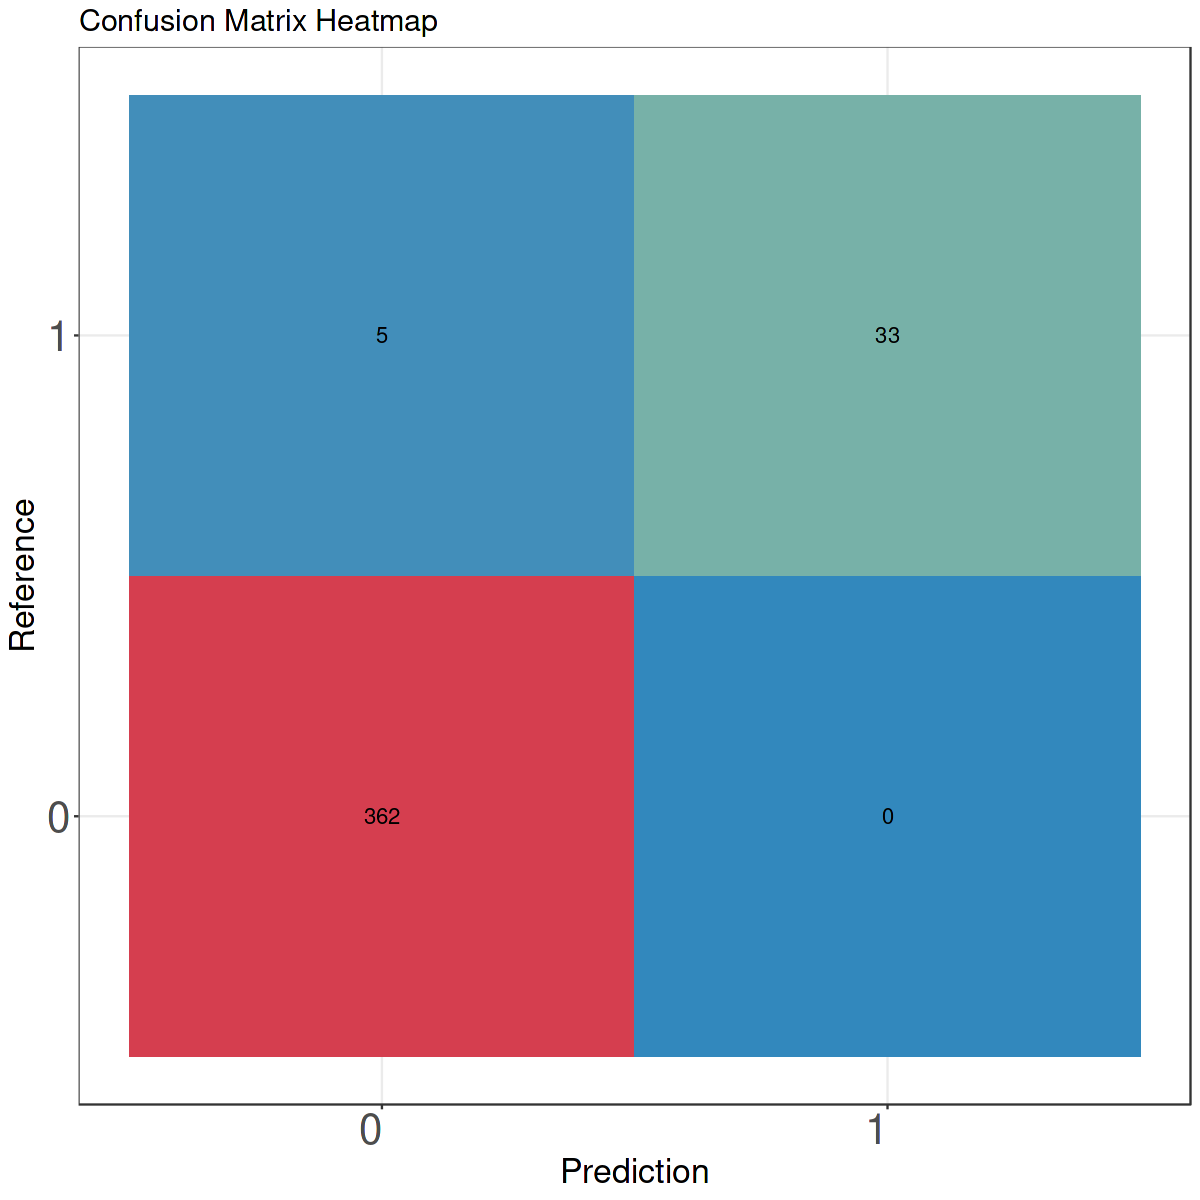

In [36]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
xgb_heatmap <- data.frame(cm_xgb$table)

ggplot(xgb_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )